### _* Memo_0707_0_

In [2]:
predicted_nums_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}
predicted_nums_list = []
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [3]:
## this code was run.
#!pip install keras-tuner

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Bidirectional
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from datetime import datetime
from tqdm import tqdm
print(f'Current Step #01 [now = {datetime.now()}')
import matplotlib.pyplot as plt
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
from IPython.display import Markdown


title = "Metrics"
row_length = 150
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 30
# 1179 3,16,18,24,40,44+21. 

Current Step #01 [now = 2025-07-15 11:15:34.309009


/tmp/ipykernel_476/462708240.py:21: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import BayesianOptimization


In [4]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 150


###### Updated 2025-07-15 11:15:34.404960

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1181|06,12,18,37,40,41|3|154|1|2|0|1|2|
|1180|06,12,18,37,40,41|3|154|1|2|0|1|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
|1152|30,31,32,35,36,37|5|201|0|0|0|6|0|
###### Updated 2025-07-15 11:15:34.413379

In [3]:
"""
Data preparation
"""

#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

In [4]:
"""
Functions
"""

def draw_markdown(rows: list):
    from IPython.display import Markdown
    # Define a variable
    # Display the variable's value in Markdown
    table_header = "|title|content|"
    table_sep = "|--|--|"
    table_rows = [table_header,
                  table_sep,
                  ]
    for row in rows:
        table_rows.append(f"|{row[0]}|{row[1]}|")
    table_rows_str = "\n".join(table_rows)
    Markdown(table_rows_str)
    for row in rows:
        print(f'{row[0]:12s} = {row[1]}')


def draw_graph(X, title):
    print(X)
    y = [i for i in range(len(X))]
    plt.figure(figsize=(12, 6))
    plt.plot(y, X, label='Nums')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    plt.legend()
    plt.show()


def draw_scatter(Y: list, title, show_line=True, show_dot=True, show_cols=[0], ext_datas=[], show_label=True, helper_line_nums=[], marker_size=3, figsize=(12, 6), save_fig=True):
    plt.figure(figsize=figsize)
    colors=['b', 'g', 'r', 'c', 'm', 'y']
    if show_line == False and show_dot == False:
        show_line = True
    last = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    
    # draw helper line
    for helper_line_num in helper_line_nums:
        helper_line = [helper_line_num for i in range(len(Y[0]))]
        X = [i for i in range(len(Y[0]))]
        plt.plot(X, helper_line, color="tab:gray")

    for show_col in show_cols:
        if show_col < len(Y):
            if show_label:
                label = f'Nums{show_col}'            
            else:
                label = ""
            X = [i for i in range(len(Y[show_col]))]
            if show_line:
                plt.plot(X, Y[show_col], label=label, color=colors[show_col])
                label = ""
            if show_dot:
                plt.plot(X, Y[show_col], marker='o', markersize=marker_size, color = colors[show_col], label=label)
        # print(f'show_col = {show_col}')
        # print(f'         = {Y[show_col][-1:][0]}')
        last[show_col].append(Y[show_col][-1:][0])
    if len(ext_datas) > 0:
        for ext in ext_datas:
            if ext[0] < 6 and ext[0] in last:
                show_col = ext[0]
                last[show_col].append(ext[1])
                loc = np.arange(len(Y[0])-1, len(Y[0]) + len(last[show_col])-1)
                if show_line:
                    plt.plot(loc, last[show_col], color='k')
                if show_dot:
                    plt.plot(loc, last[show_col], marker='o', markersize=marker_size, color='k')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    if show_label:
        plt.legend()
    if save_fig:
        plt.savefig(f'img/{title}_{datetime.now().strftime('%Y_%m%d_%H%M%S')}')
    plt.show()

def get_pre_bef(nums, wanted_num):
    results = []
    for pos in range(len(nums)):
        parts = []
        if nums[pos] == wanted_num:
            if pos > 0 and pos < (len(nums) - 1 ):
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos == 0 and pos < (len(nums) - 1 ):
                parts.append(-1)
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos >= (len(nums) - 1 ) and pos > 0:
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(-1)
            results.append(parts)
    return results
            

def draw_average(my_list, length, selected, helper_line_nums=[10,20,30,40], show_diff=False):
    print(f'{"_"*40}')
    averages = []
    metrics = []
    show_cols = [0]
    for i in range(len(my_list) - length):
        item_part = my_list[i: i+length]
        average = np.mean(item_part)
        averages.append(float(average))
    metrics.append(averages)
    ordered = averages.copy()
    ordered.sort()
    draw_markdown([('최소값',f'{ordered[0:5]}'),
                   ('최대값',f'{ordered[-5:]}'),
                   ('마지막',f'{averages[-5:]}')
                  ])
    if show_diff:
        diff = [0] + [averages[i] - averages[i-1] for i in range(1, len(averages), 1)]
        metrics.append(diff)
        show_cols.append(1)
    draw_scatter(metrics, f'average : {selected+1} {length}', True, True, show_cols=show_cols, helper_line_nums=helper_line_nums)


def get_frequency(datas):
    """ get_frequency """
    # datas = my_list.copy()
    # datas.sort()
    ordered_dict = {}
    for key in datas:
        if key not in ordered_dict:
            ordered_dict[key] = 1
        else:
            ordered_dict[key] += 1
    ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
    return ordered_dict_sorted


def get_information(selected, num_data, ext_data, wanted_data_length, helper_line_nums_1, helper_line_nums_2, show_diff=False, lengths=[5,8,10,13,15], start_pos_0=0, start_pos_1=0):
    """ get_information """
    length = 8
    if start_pos_0 > len(num_data):
        start_pos_0 = 0
    if start_pos_1 > len(num_data):
        start_pos_1 = 0
    draw_scatter([num_data[start_pos_0:]],
                 f'Line Num : {selected+1}',
                 True, True,
                 [0],
                 [(0,ext_data)],
                 helper_line_nums=helper_line_nums_1)
    # print(f'start_pos_0 = {start_pos_0}')
    # print(f'start_pos_1 = {start_pos_1}')
    my_list = num_data[start_pos_1:] + [ext_data]
    last_num = num_data[-1:][0]
    ordered = my_list.copy()
    ordered.sort()
    ordered = list(set(ordered))
    freq_parts = get_frequency(my_list)
    freq_all = get_frequency(num_data)
    pre_bef = get_pre_bef(num_data, last_num)
    draw_markdown([
        ('최소 값',f'{ordered[:wanted_data_length]}'),
        ('최대 값',f'{ordered[-wanted_data_length:]}'),
        ('사용자 선택',f'{ext_data}'),
        ('마지막 값',f'{last_num}'),
        ('마지막 값들',f'{num_data[-wanted_data_length:]}'),
        ('자주 나오는 값(부분)',f'{freq_parts[-wanted_data_length:]}'),
        ('자주 나오는 값(전체)',f'{freq_all[-wanted_data_length:]}'),
        ('마지막 수의 앞과 뒤',f'{pre_bef}')
    ]
    )
    for length in lengths:
        draw_average(my_list, length=length, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)


class DataScaling():
    def __init__(self):
        # self._scaler_cls = MinMaxScaler()
        self._scaler_cls = StandardScaler()

    def fit_transform(self, data):
        return self._scaler_cls.fit_transform(data)

    def inverse_transform(self, datas: list):
        inversed_data = []
        cnt = 1
        for data in datas:
            # print(data[0])
            cnt += 1
            if data[1] == True:
                inversed = self._scaler_cls.inverse_transform(data[0].reshape(-1, 1))
            else:
                inversed = self._scaler_cls.inverse_transform(data[0])
            inversed_data.append(inversed)
        return inversed_data


def analyze_v1(random_state,
               row_data,
               layer_count=3,
               activation='sigmoid',
               units=50,
               epochs=50,
               batch_size=1,
               draw_graph=True,
               sequence_length=10,
               train_ratio=0.85,
               verbose=0):
    # 1. Prepare the Data
    # Create sample time series data
    df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
    if verbose > 1:
        print('df', df)
    if verbose > 1:
        print(f'Current Step #02 [now = {datetime.now()}]')

    data = df['matched_cnts'].values.reshape(-1, 1)

    # Normalize the data
    scaler = DataScaling()
    scaled_data = scaler.fit_transform(data)
    if verbose > 1:
        print(f'Current Step #04 [now = {datetime.now()}]')

    # Define sequence length (timesteps)

    # Create sequences for training
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length, 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    if verbose > 1:
        print(f'Current Step #06 [now = {datetime.now()}]')

    # Reshape X for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    if verbose > 1:
        print(f'Current Step #08 [now = {datetime.now()}]')

    # Split data into training and testing sets
    train_size = int(len(X) * train_ratio)

    X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
    y_train, y_test = y[:train_size], y[train_size:]
    if verbose > 1:
        print(f'Current Step #10 [now = {datetime.now()}]')

    tf.random.set_seed(random_state)

    # 2. Build the LSTM Model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))
    # model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    for i in range(layer_count):
        model.add(LSTM(units=units, return_sequences=True, activation=activation))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(units=1)) # Output layer for predicting a single value
    if verbose > 1:
        print(f'Current Step #12 [now = {datetime.now()}]')

    # 3. Compile and Train the Model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    if verbose > 1:
        print(f'Current Step #14 [now = {datetime.now()}]')
    # 4. Make Predictions
    train_predict = model.predict(X_train, verbose=verbose)
    test_predict = model.predict(X_test, verbose=verbose)
    last_predict = model.predict(X_last, verbose=verbose)
    if verbose > 0:
        print(f'Current Step #16 [now = {datetime.now()}]')

    # Inverse transform predictions to original scale
    scaled_data1 = scaled_data
    wanted_datas = [(train_predict, False),
                    (test_predict, False),
                    (last_predict, True),
                    (y_train, True),
                    (y_test, True),
                    (scaled_data, False)]
    inversed_datas = scaler.inverse_transform(wanted_datas)
    train_predict = inversed_datas[0]
    test_predict = inversed_datas[1]
    last_predict = inversed_datas[2]
    y_train_original = inversed_datas[3]
    y_test_original = inversed_datas[4]
    scaled_data = inversed_datas[5]

    if verbose > 1:
        print(f'Current Step #18 [now = {datetime.now()}]')

    # 5. Evaluate the Model (Optional, but recommended)
    from sklearn.metrics import mean_squared_error
    train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predict))

    if verbose > 0:
        print(f'Current Step #20 [now = {datetime.now()}]')
        print(f"Train RMSE: {train_rmse}")
        print(f"Test RMSE: {test_rmse}")
        print(f'random_state = {random_state}')
        print(f'last_prediction = {last_predict}')
        print(f'data_max_val = {scaled_data.max()}')
    # You can also visualize the results
    if draw_graph:
        # import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.plot(scaled_data, label='Original Data')
        plt.plot(np.arange(sequence_length,
                           sequence_length + len(train_predict)),
                 train_predict,
                 label='Train Predictions')
        plt.plot(np.arange(sequence_length + len(train_predict),
                           sequence_length + len(train_predict) + len(test_predict)),
                 test_predict,
                 label='Test Predictions')
        plt.plot(np.arange(sequence_length + len(train_predict) + len(test_predict),
                       sequence_length + len(train_predict) + len(test_predict) + len(last_predict)),
                 last_predict,
                 label='Last Predictions')
        plt.xlabel(f'{random_state}\'s Time Step')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
    return scaled_data.max(), last_predict, random_state


def data_prepare(row_data, train_ratio=0.85, sequence_length=10):
    ## data preparation
    print(f'Current Step #06 [now = {datetime.now()}]')
    df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
    data = df['matched_cnts'].values.reshape(-1, 1)
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    print(f'Current Step #04 [now = {datetime.now()}]')
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length, 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    # Reshape X for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    # Split data into training and testing sets
    train_size = int(len(X) * train_ratio)
    X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
    y_train, y_test = y[:train_size], y[train_size:]
    print(f'Current Step #08 [now = {datetime.now()}]')    
    return X_train, X_test, X_last, y_train, y_test, scaler


def search_model(X_train, X_test, X_last, y_train, y_test, n_epochs=50, max_trial=50, random_state=355314, validation_split=0.05, title="model_cur", verbose=0):
    n_input = X_train.shape[1]
    print(f'Current Step #10 [now = {datetime.now()}]')
    tf.random.set_seed(random_state)
    def build_model(hp):
        # print(f'Current Step #20 [now = {datetime.now()}]')    
        model = Sequential()
        model.add(Input(shape=(n_input, 1)))    
        model.add(LSTM(units=hp.Int('units',
                                    min_value=32,
                                    max_value=512,
                                    step=32),
                       return_sequences=True,
                       activation='tanh'))    
        model.add(Dense(units=hp.Int('units',
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='tanh'))
        model.add(Dense(1))
        # print(f'Current Step #22 [now = {datetime.now()}]')    
        model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',
                      values=[1e-2, 1e-3, 1e-4])))
        # print(f'Current Step #24 [now = {datetime.now()}]')    
        return model
    
    print(f'Current Step #12 [now = {datetime.now()}]')    
    bayesian_opt_tuner = BayesianOptimization(
        build_model,
        objective='mse',
        max_trials=max_trial,
        # executions_per_trial=1,
        directory=os.path.normpath('./models/'),
        project_name=title,
        overwrite=True)
    print(f'Current Step #14 [now = {datetime.now()}]')
    if validation_split > 0:
        bayesian_opt_tuner.search(X_train,
                                  y_train,
                                  epochs=n_epochs,
                                  # validation_data=(X_test, y_test),
                                  validation_split=validation_split,
                                  verbose=verbose)
    else:
        bayesian_opt_tuner.search(X_train,
                                  y_train,
                                  epochs=n_epochs,
                                  verbose=verbose)
    print(f'Current Step #16 [now = {datetime.now()}]')    
    bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
    model = bayes_opt_model_best_model[0]
    if verbose > -1:
        print(model.summary())
    print(f'Current Step #18 [now = {datetime.now()}]')    
    return model

print(f'Current work : {datetime.now()}')

Current work : 2025-07-11 17:07:48.225506


In [5]:
predicted_nums = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [ ]:
### predict sum
row_data = sums[:-1]
n_epochs = 50
max_trial = 25
verbose = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     title=f"sum_{datetime.now()}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)

In [7]:
### predict round 1
selected = 0
## data preparation
row_data = row_list_none_last[selected]
n_epochs = 50
max_trial = 25
verbose = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     title=f"predict_{selected+1}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
predicted_nums[selected] = scaled_predicted

Current Step #06 [now = 2025-07-11 17:09:50.401373]
Current Step #04 [now = 2025-07-11 17:09:50.402417]
Current Step #08 [now = 2025-07-11 17:09:50.402574]
Current Step #10 [now = 2025-07-11 17:09:50.402668]
Current Step #12 [now = 2025-07-11 17:09:50.404652]
Current Step #14 [now = 2025-07-11 17:09:50.444498]


/opt/conda/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL: .

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Current Step #16 [now = 2025-07-11 17:12:13.007643]


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,121 (82.50 KB)

 Trainable params: 21,121 (82.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Current Step #18 [now = 2025-07-11 17:12:13.765360]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
predicted =  [[[-0.00149859]]] [[7.29986]]


In [8]:
### predict round 2
selected = 1
## data preparation
row_data = row_list_none_last[selected]
n_epochs = 50
max_trial = 25
verbose = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     title=f"predict_{selected+1}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
predicted_nums[selected] = scaled_predicted

Current Step #06 [now = 2025-07-11 17:12:13.873036]
Current Step #04 [now = 2025-07-11 17:12:13.874383]
Current Step #08 [now = 2025-07-11 17:12:13.874551]
Current Step #10 [now = 2025-07-11 17:12:13.874680]
Current Step #12 [now = 2025-07-11 17:12:13.877308]
Current Step #14 [now = 2025-07-11 17:12:13.921551]


/opt/conda/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The opti

Current Step #16 [now = 2025-07-11 17:15:18.004578]


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 352)        │       498,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 352)        │       124,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │           353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,041 (2.38 MB)

 Trainable params: 623,041 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

None
Current Step #18 [now = 2025-07-11 17:15:19.017726]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
predicted =  [[[0.00879826]]] [[13.28232]]


In [9]:
### predict round 3
selected = 2
## data preparation
row_data = row_list_none_last[selected]
n_epochs = 50
max_trial = 25
verbose = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     title=f"predict_{selected+1}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
predicted_nums[selected] = scaled_predicted

Current Step #06 [now = 2025-07-11 17:15:19.142644]
Current Step #04 [now = 2025-07-11 17:15:19.144084]
Current Step #08 [now = 2025-07-11 17:15:19.144266]
Current Step #10 [now = 2025-07-11 17:15:19.144426]
Current Step #12 [now = 2025-07-11 17:15:19.149129]
Current Step #14 [now = 2025-07-11 17:15:19.210986]
Current Step #16 [now = 2025-07-11 17:18:12.157627]


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 160)        │       103,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 160)        │        25,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,601 (506.25 KB)

 Trainable params: 129,601 (506.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Current Step #18 [now = 2025-07-11 17:18:13.358860]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
predicted =  [[[-0.00815414]]] [[19.887342]]


In [10]:
### predict round 4
selected = 3
## data preparation
row_data = row_list_none_last[selected]
n_epochs = 50
max_trial = 25
verbose = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     title=f"predict_{selected+1}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
predicted_nums[selected] = scaled_predicted

Current Step #06 [now = 2025-07-11 17:18:13.459531]
Current Step #04 [now = 2025-07-11 17:18:13.460944]
Current Step #08 [now = 2025-07-11 17:18:13.461112]
Current Step #10 [now = 2025-07-11 17:18:13.461247]
Current Step #12 [now = 2025-07-11 17:18:13.464842]
Current Step #14 [now = 2025-07-11 17:18:13.506422]
Current Step #16 [now = 2025-07-11 17:21:59.744037]


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 192)        │       148,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 192)        │        37,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │           193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,241 (727.50 KB)

 Trainable params: 186,241 (727.50 KB)

 Non-trainable params: 0 (0.00 B)

None
Current Step #18 [now = 2025-07-11 17:22:01.225783]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
predicted =  [[[-0.0077344]]] [[25.81733]]


In [11]:
### predict round 5
selected = 4
## data preparation
row_data = row_list_none_last[selected]
n_epochs = 25
max_trial = 25
verbose = 0
validation_split = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     validation_split = validation_split,
                     title=f"predict_{selected+1}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
predicted_nums[selected] = scaled_predicted

Current Step #06 [now = 2025-07-11 17:22:01.335424]
Current Step #04 [now = 2025-07-11 17:22:01.336756]
Current Step #08 [now = 2025-07-11 17:22:01.336944]
Current Step #10 [now = 2025-07-11 17:22:01.337073]
Current Step #12 [now = 2025-07-11 17:22:01.341352]
Current Step #14 [now = 2025-07-11 17:22:01.385246]
Current Step #16 [now = 2025-07-11 17:24:42.331507]


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 320)        │       412,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 320)        │       102,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │           321 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,201 (1.97 MB)

 Trainable params: 515,201 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

None
Current Step #18 [now = 2025-07-11 17:24:44.139107]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
predicted =  [[[-0.03386387]]] [[32.65308]]


In [12]:
### predict round 6
selected = 5
## data preparation
row_data = row_list_none_last[selected]
n_epochs = 50
max_trial = 25
verbose = 0
validation_split = 0
X_train, X_test, X_last, y_train, y_test, scaler = data_prepare(row_data)
model = search_model(X_train=X_train,
                     X_test=X_test,
                     X_last=X_last,
                     y_train=y_train,
                     y_test=y_test,
                     n_epochs=n_epochs,
                     max_trial=max_trial,
                     validation_split = validation_split,
                     title=f"predict_{selected+1}",
                     verbose=verbose)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
predicted_nums[selected] = scaled_predicted

Current Step #06 [now = 2025-07-11 17:24:44.289884]
Current Step #04 [now = 2025-07-11 17:24:44.291772]
Current Step #08 [now = 2025-07-11 17:24:44.291969]
Current Step #10 [now = 2025-07-11 17:24:44.292151]
Current Step #12 [now = 2025-07-11 17:24:44.300086]
Current Step #14 [now = 2025-07-11 17:24:44.349881]
Current Step #16 [now = 2025-07-11 17:28:36.342280]


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 96)         │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 96)         │         9,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,041 (183.75 KB)

 Trainable params: 47,041 (183.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Current Step #18 [now = 2025-07-11 17:28:38.525866]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
predicted =  [[[-0.01210532]]] [[39.15555]]


In [25]:
predicted_nums_list_0 = [float(i) for i in predicted_nums.values()]
predicted_nums_list_1 = [round(i) for i in predicted_nums_list_0]

print('float', predicted_nums_list_0)
print('int', predicted_nums_list_1)
print('sum', sum(predicted_nums_list_1))
for i in range(len(predicted_nums_list_1)):
    predicted_nums_dict[i] = predicted_nums_list_1[i]
predicted_nums_list = predicted_nums_list_1

float [7.299860000610352, 13.282320022583008, 19.88734245300293, 25.81732940673828, 32.653079986572266, 39.155548095703125]
int [7, 13, 20, 26, 33, 39]
sum 138


/tmp/ipykernel_18510/1257000854.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_nums_list_0 = [float(i) for i in predicted_nums.values()]


In [ ]:
(np.float64(30.000000000000004), array([[6.1207676]], dtype=float32), 314558)
(np.float64(33.0), array([[4.0026402]], dtype=float32), 314558)
(np.float64(35.0), array([[15.271533]], dtype=float32), 314558)
(np.float64(40.0), array([[29.240566]], dtype=float32), 314558)
(np.float64(44.0), array([[37.42968]], dtype=float32), 314558)
(np.float64(45.0), array([[32.72621]], dtype=float32), 314558)

(np.float64(30.0), array([[7.3217187]], dtype=float32), 314558)
(np.float64(33.0), array([[13.810979]], dtype=float32), 314558)
(np.float64(35.0), array([[19.010557]], dtype=float32), 314558)
(np.float64(40.0), array([[25.239151]], dtype=float32), 314558)
(np.float64(44.0), array([[34.730366]], dtype=float32), 314558)
(np.float64(45.0), array([[38.54149]], dtype=float32), 314558)

(np.float64(30.0), array([[8.11678]], dtype=float32), 30014558)
(np.float64(33.0), array([[13.650756]], dtype=float32), 30014558)
(np.float64(35.0), array([[19.386393]], dtype=float32), 30014558)
(np.float64(40.0), array([[25.771692]], dtype=float32), 30014558)
(np.float64(44.0), array([[32.6605]], dtype=float32), 30014558)
(np.float64(45.0), array([[39.21304]], dtype=float32), 30014558)

In [37]:
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()


##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

In [20]:
print(predicted_nums)

{0: array([[7.29986]], dtype=float32), 1: array([[13.28232]], dtype=float32), 2: array([[19.887342]], dtype=float32), 3: array([[25.81733]], dtype=float32), 4: array([[32.65308]], dtype=float32), 5: array([[39.15555]], dtype=float32)}


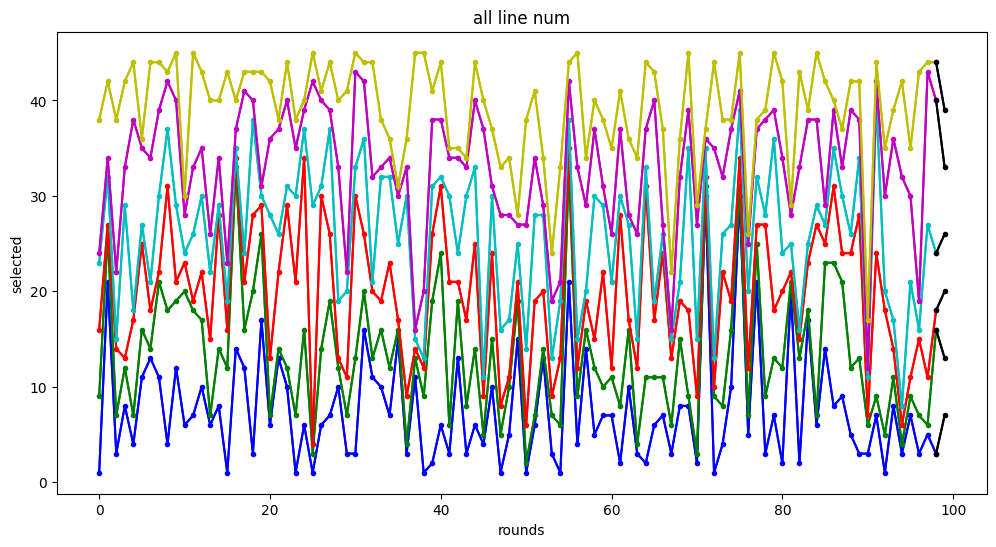

In [42]:
# ext_datas = []
# for key in candidate:
#     ext_datas.append((key, candidate[key]))
ext_datas = [(i, predicted_nums_list[i]) for i in range(len(predicted_nums_list))]
show_cols = [0, 1, 2, 3, 4, 5]
helper_line_nums = []

show_label = False
start_pos = 50
show_datas = []
for row in row_list:
    show_datas.append(row[start_pos:])

draw_scatter(show_datas,
             'all line num',
             True, True,
             show_cols,
             ext_datas,
             show_label,
             helper_line_nums=helper_line_nums)


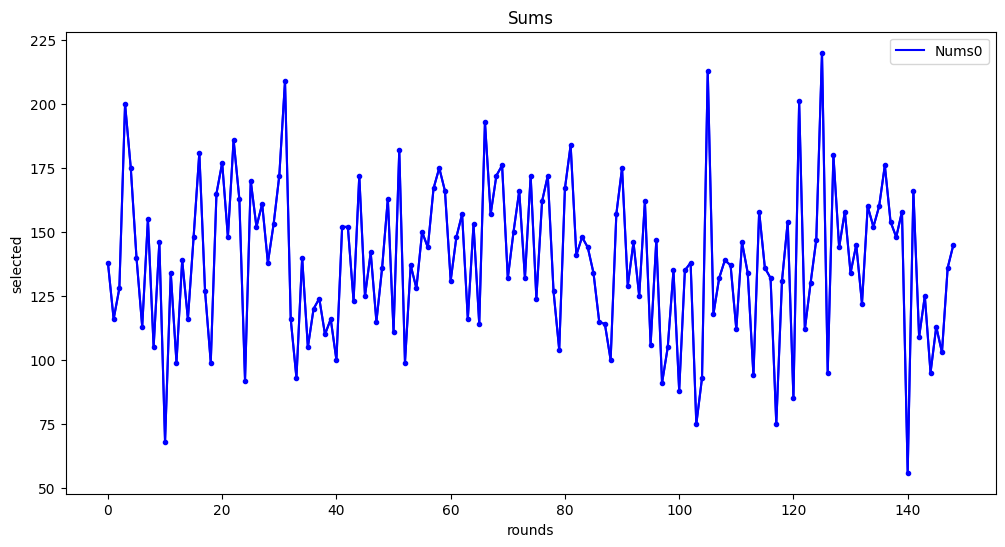

last : [56, 166, 109, 125, 95, 113, 103, 136, 145]


In [43]:
draw_scatter([sums[:-1]] + [sum(predicted_nums_list)], f'Sums')
print(f'last : {sums[-10:-1]}')

In [ ]:
(np.float64(30.000000000000004), array([[6.1207676]], dtype=float32), 314558)
(np.float64(33.0), array([[4.0026402]], dtype=float32), 314558)
(np.float64(35.0), array([[15.271533]], dtype=float32), 314558)
(np.float64(40.0), array([[29.240566]], dtype=float32), 314558)
(np.float64(44.0), array([[37.42968]], dtype=float32), 314558)
(np.float64(45.0), array([[32.72621]], dtype=float32), 314558)

(np.float64(30.0), array([[7.3217187]], dtype=float32), 314558)
(np.float64(33.0), array([[13.810979]], dtype=float32), 314558)
(np.float64(35.0), array([[19.010557]], dtype=float32), 314558)
(np.float64(40.0), array([[25.239151]], dtype=float32), 314558)
(np.float64(44.0), array([[34.730366]], dtype=float32), 314558)
(np.float64(45.0), array([[38.54149]], dtype=float32), 314558)

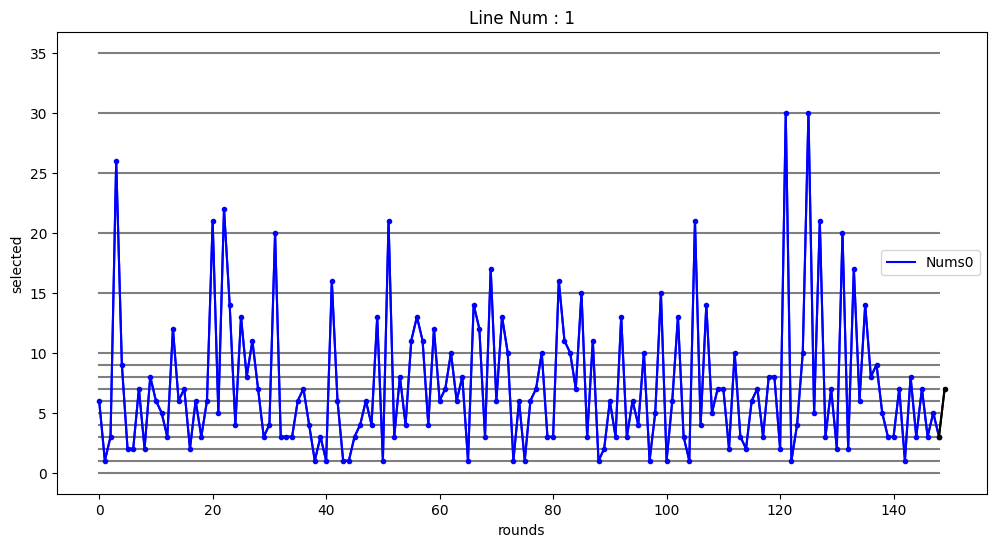

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
사용자 선택       = 7
마지막 값        = 3
마지막 값들       = [8, 2, 30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3]
자주 나오는 값(부분) = [(26, 1), (22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 8), (2, 10), (4, 10), (7, 14), (1, 15), (6, 18), (3, 25)]
자주 나오는 값(전체) = [(26, 1), (22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 8), (2, 10), (4, 10), (7, 13), (1, 15), (6, 18), (3, 25)]
마지막 수의 앞과 뒤  = [[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [2

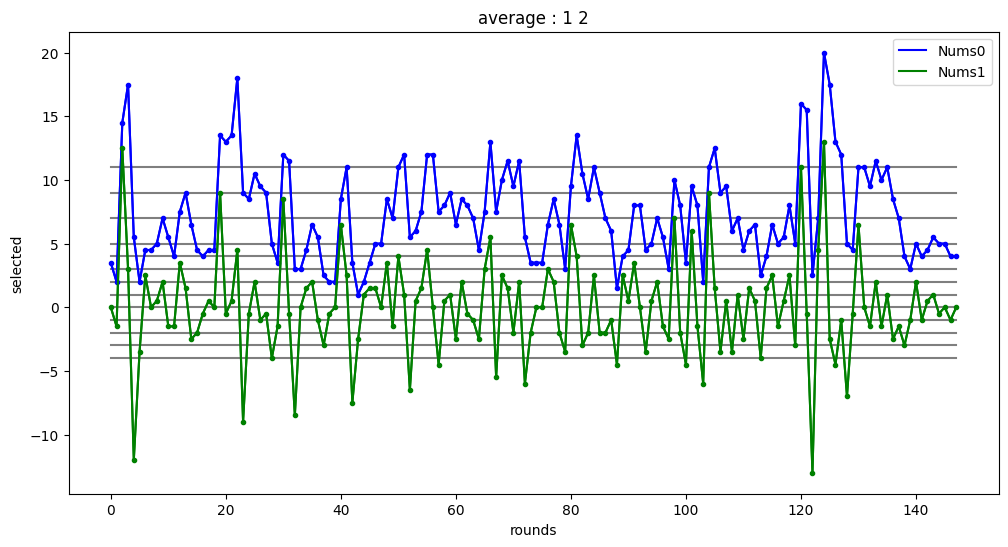

________________________________________
최소값          = [3.0, 3.0, 3.2, 3.6, 3.8]
최대값          = [13.2, 13.6, 13.8, 14.0, 15.0]
마지막          = [4.4, 5.2, 4.4, 5.2, 4.2]


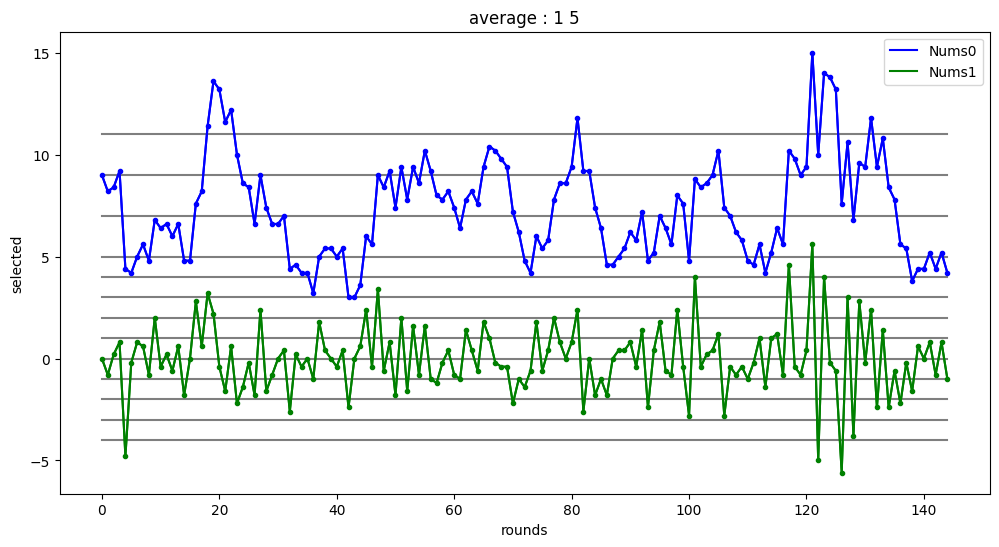

________________________________________
최소값          = [3.5, 3.75, 4.0, 4.125, 4.125]
최대값          = [11.625, 12.25, 12.25, 12.875, 13.0]
마지막          = [4.875, 4.625, 4.375, 4.625, 4.625]


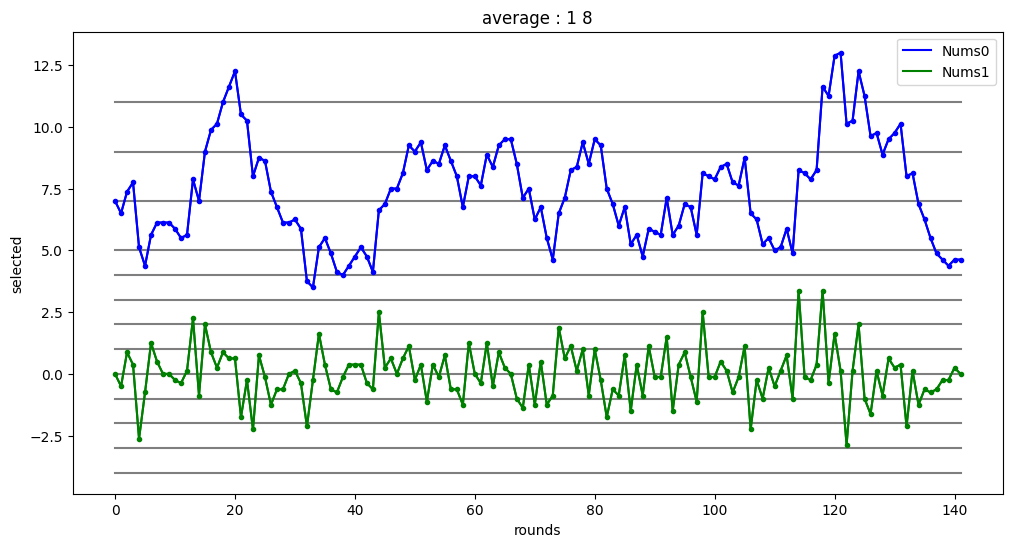

________________________________________
최소값          = [4.0, 4.2, 4.3, 4.3, 4.5]
최대값          = [11.3, 11.3, 11.4, 11.7, 11.9]
마지막          = [6.1, 5.4, 4.9, 4.5, 4.3]


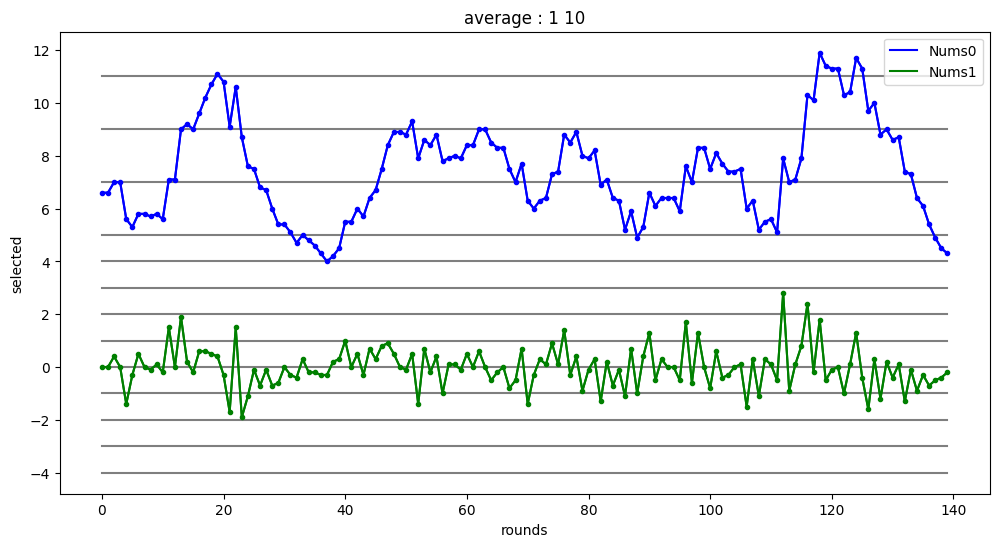

________________________________________
최소값          = [4.230769230769231, 4.230769230769231, 4.3076923076923075, 4.384615384615385, 4.538461538461538]
최대값          = [10.846153846153847, 11.0, 11.076923076923077, 11.153846153846153, 11.692307692307692]
마지막          = [6.615384615384615, 7.0, 5.923076923076923, 5.846153846153846, 5.0]


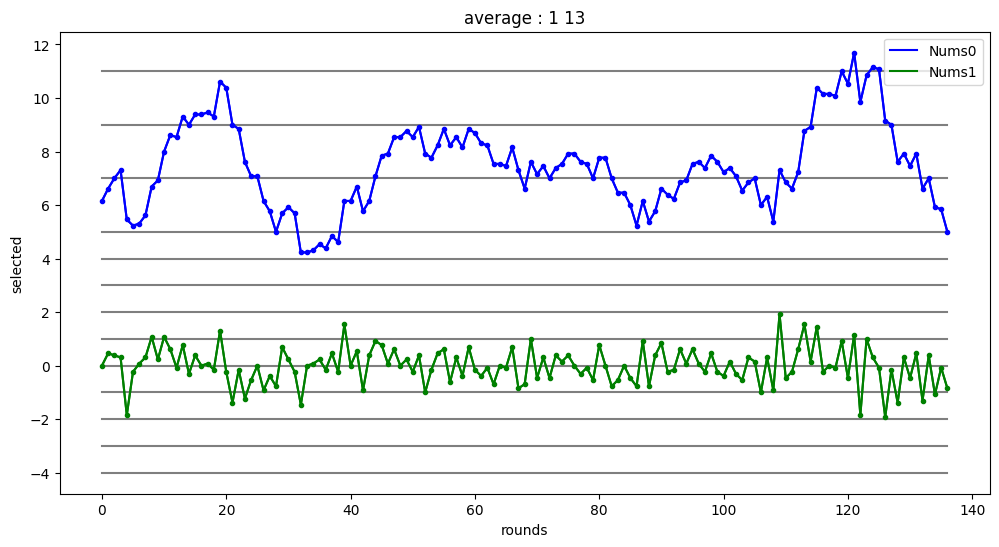

________________________________________
최소값          = [4.133333333333334, 4.333333333333333, 4.4, 4.733333333333333, 5.066666666666666]
최대값          = [10.533333333333333, 10.6, 10.666666666666666, 10.8, 11.466666666666667]
마지막          = [7.2, 7.533333333333333, 6.4, 6.6, 5.666666666666667]


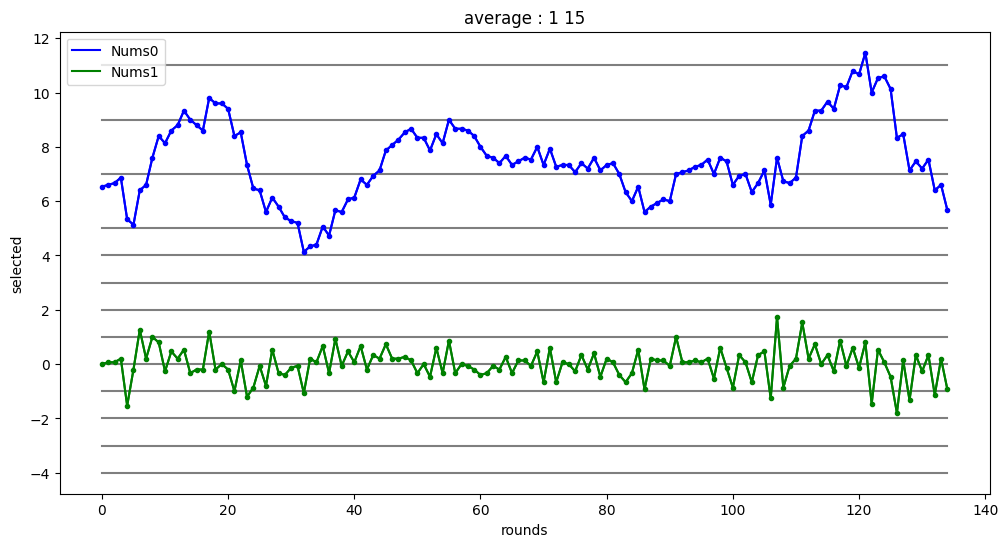

________________________________________
최소값          = [4.95, 5.1, 5.3, 5.35, 5.35]
최대값          = [10.0, 10.0, 10.05, 10.2, 10.35]
마지막          = [8.7, 7.55, 7.45, 6.65, 6.65]


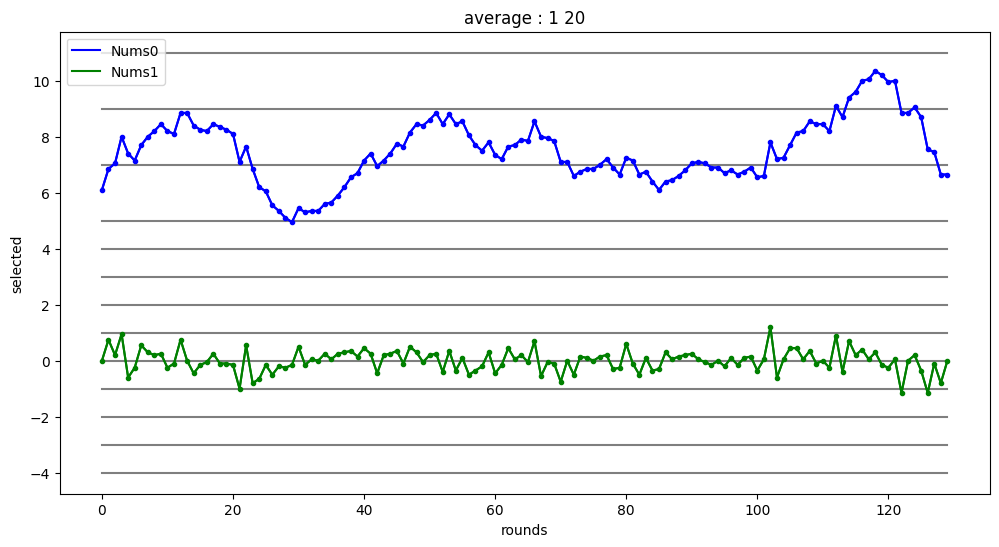

________________________________________
최소값          = [5.56, 5.68, 5.76, 5.8, 5.84]
최대값          = [9.12, 9.12, 9.16, 9.2, 9.24]
마지막          = [8.84, 9.04, 7.96, 8.12, 8.08]


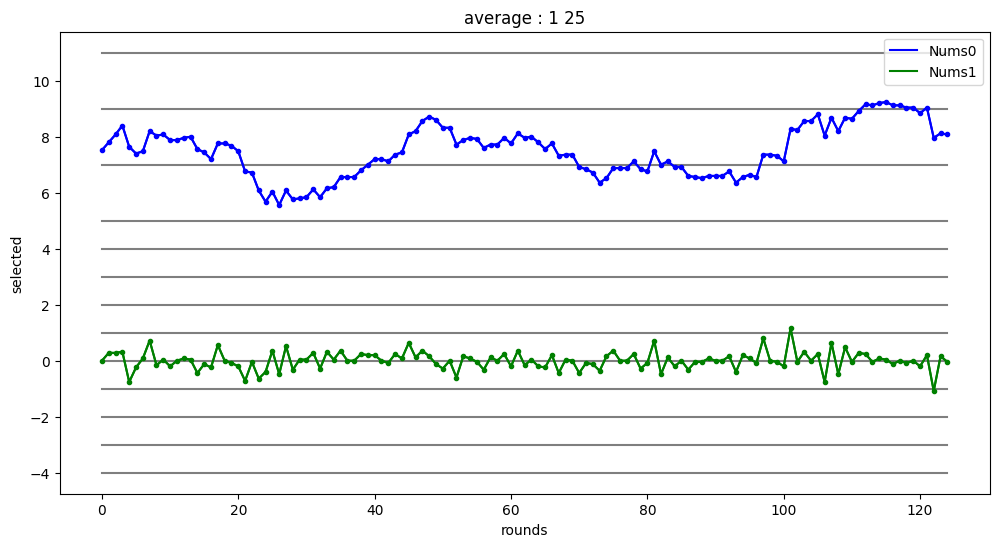

________________________________________
최소값          = [6.133333333333334, 6.2, 6.2, 6.266666666666667, 6.266666666666667]
최대값          = [8.633333333333333, 8.666666666666666, 8.733333333333333, 8.8, 8.9]
마지막          = [8.433333333333334, 8.466666666666667, 8.333333333333334, 8.4, 8.233333333333333]


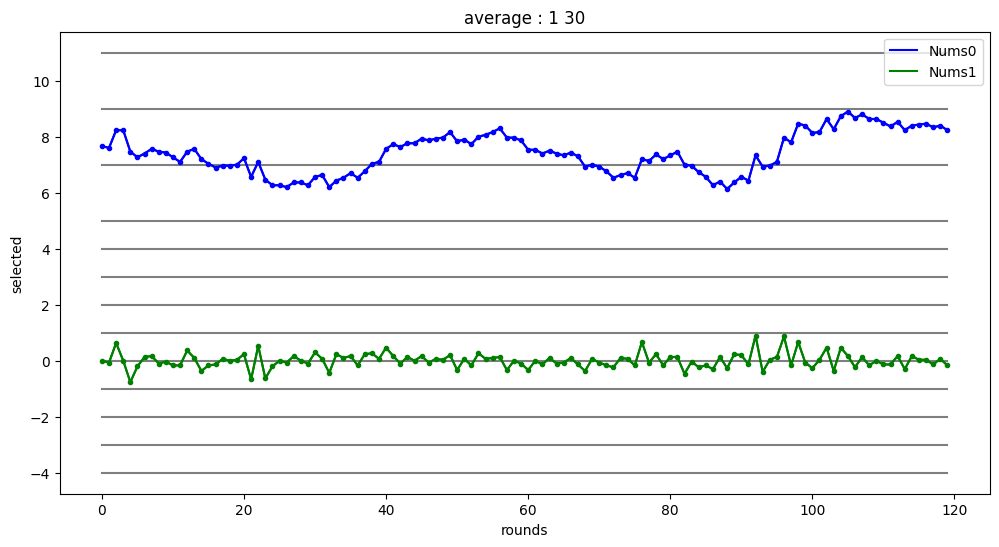

In [39]:
Round = 1
############################
selected = Round - 1
ext_data = predicted_nums_list[selected]
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]
get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

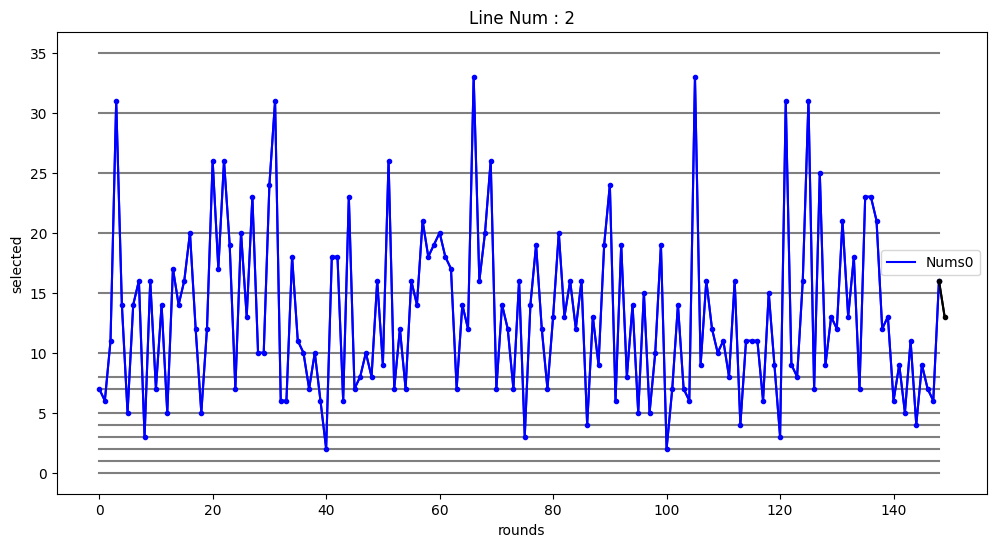

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
최대 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 13
마지막 값        = 16
마지막 값들       = [9, 3, 31, 9, 8, 16, 31, 7, 25, 9, 13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16]
자주 나오는 값(부분) = [(25, 1), (24, 2), (2, 2), (33, 2), (15, 2), (3, 3), (17, 3), (21, 3), (4, 3), (31, 4), (26, 4), (23, 4), (20, 5), (8, 5), (5, 6), (19, 6), (18, 6), (11, 7), (10, 7), (13, 8), (9, 8), (6, 10), (14, 10), (12, 10), (16, 13), (7, 16)]
자주 나오는 값(전체) = [(25, 1), (24, 2), (2, 2), (33, 2), (15, 2), (3, 3), (17, 3), (21, 3), (4, 3), (31, 4), (26, 4), (23, 4), (20, 5), (8, 5), (5, 6), (19, 6), (18, 6), (11, 7), (13, 7), (10, 7), (9, 8), (6, 10), (14, 10), (12, 10), (16, 13), (7, 16)]
마지막 수의 앞과 뒤  = [[14, 16, 3], [3, 16, 7], [14, 16, 20], [8, 16, 9], [7, 16, 14], [33, 16, 20], [7, 16, 3], [13, 16, 12], [12,

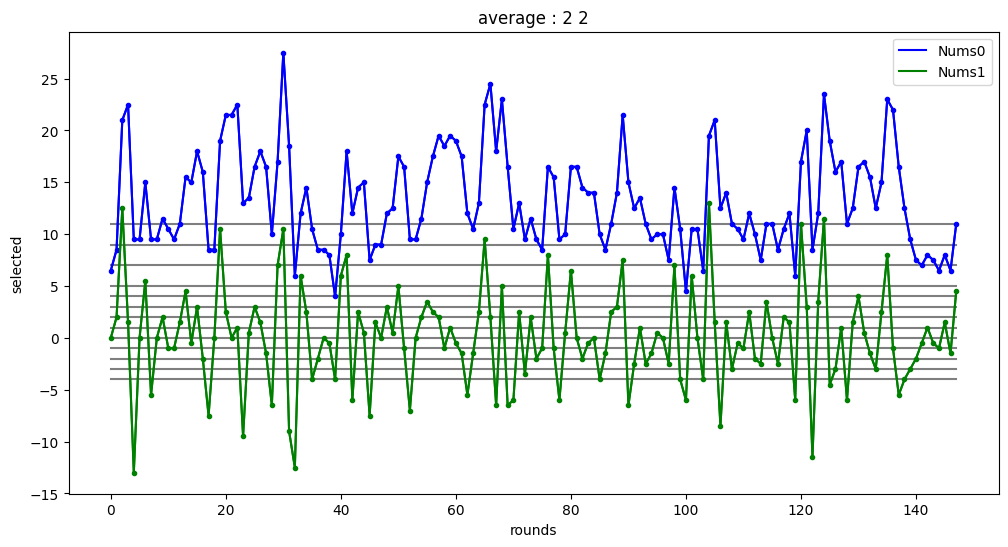

________________________________________
최소값          = [7.0, 7.0, 7.2, 7.2, 7.4]
최대값          = [19.2, 19.6, 20.0, 20.4, 21.4]
마지막          = [7.0, 7.6, 7.2, 7.4, 8.4]


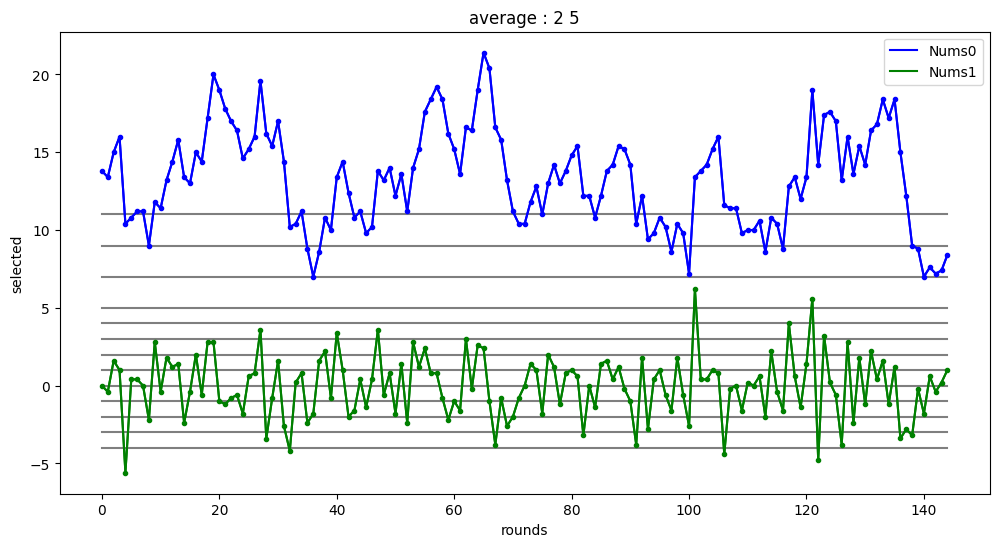

________________________________________
최소값          = [7.125, 8.0, 8.375, 8.625, 8.75]
최대값          = [17.5, 17.75, 17.875, 18.125, 18.875]
마지막          = [10.125, 8.625, 8.0, 7.125, 8.375]


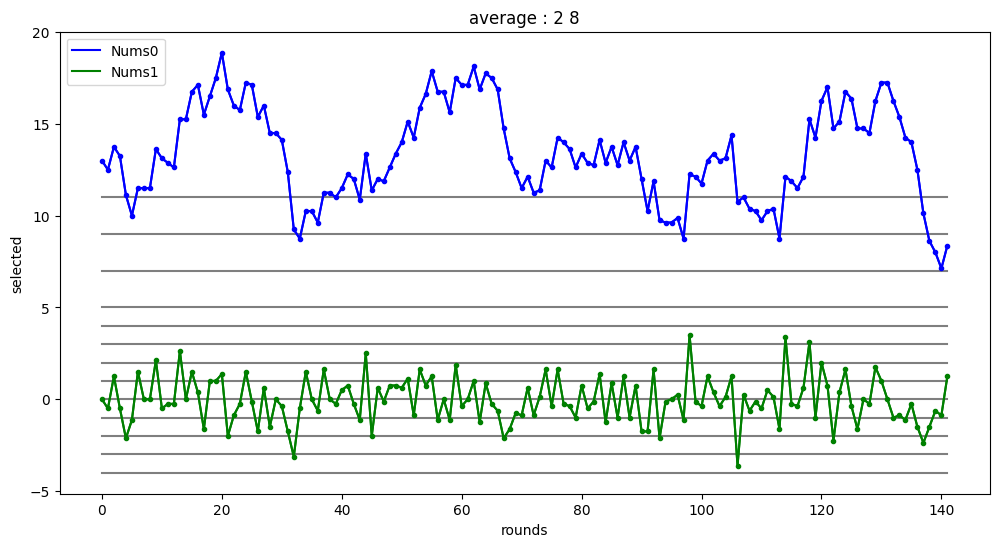

________________________________________
최소값          = [8.2, 8.6, 9.0, 9.4, 9.4]
최대값          = [17.4, 17.6, 17.9, 18.3, 18.3]
마지막          = [12.7, 11.3, 9.7, 8.2, 8.6]


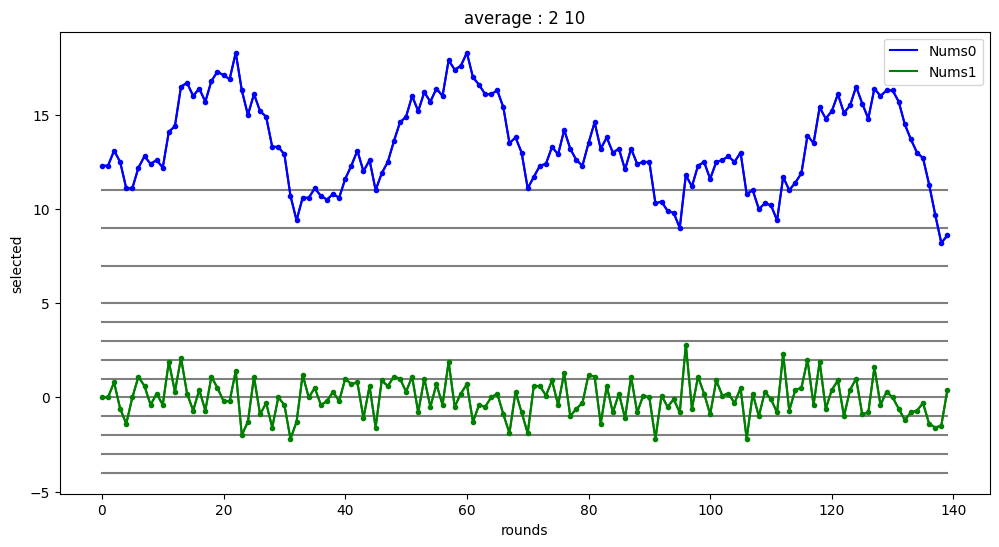

________________________________________
최소값          = [9.76923076923077, 10.076923076923077, 10.076923076923077, 10.23076923076923, 10.461538461538462]
최대값          = [17.46153846153846, 17.615384615384617, 17.846153846153847, 18.307692307692307, 18.53846153846154]
마지막          = [12.692307692307692, 12.384615384615385, 11.538461538461538, 11.461538461538462, 10.923076923076923]


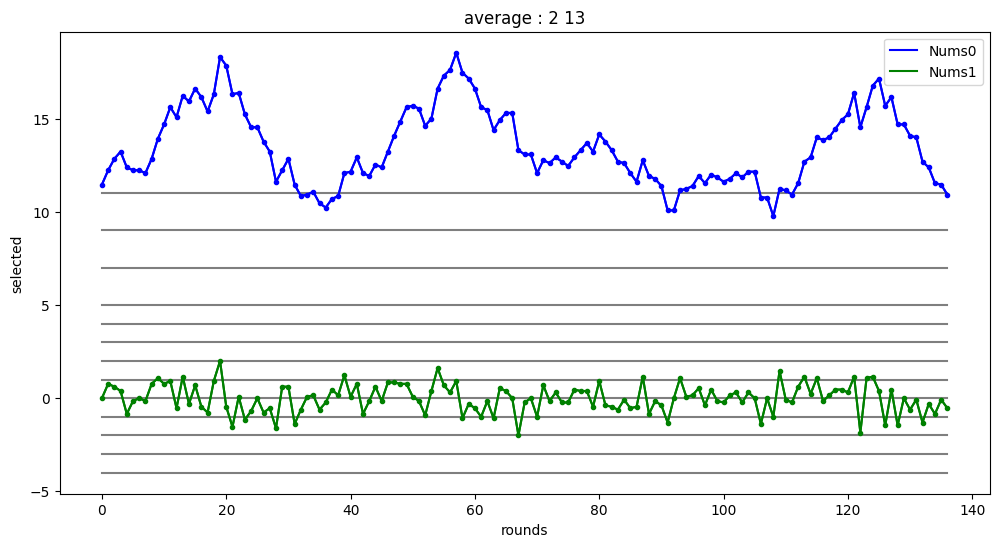

________________________________________
최소값          = [10.133333333333333, 10.4, 10.533333333333333, 10.666666666666666, 10.666666666666666]
최대값          = [17.0, 17.066666666666666, 17.466666666666665, 17.466666666666665, 18.066666666666666]
마지막          = [13.2, 13.0, 12.066666666666666, 11.6, 11.466666666666667]


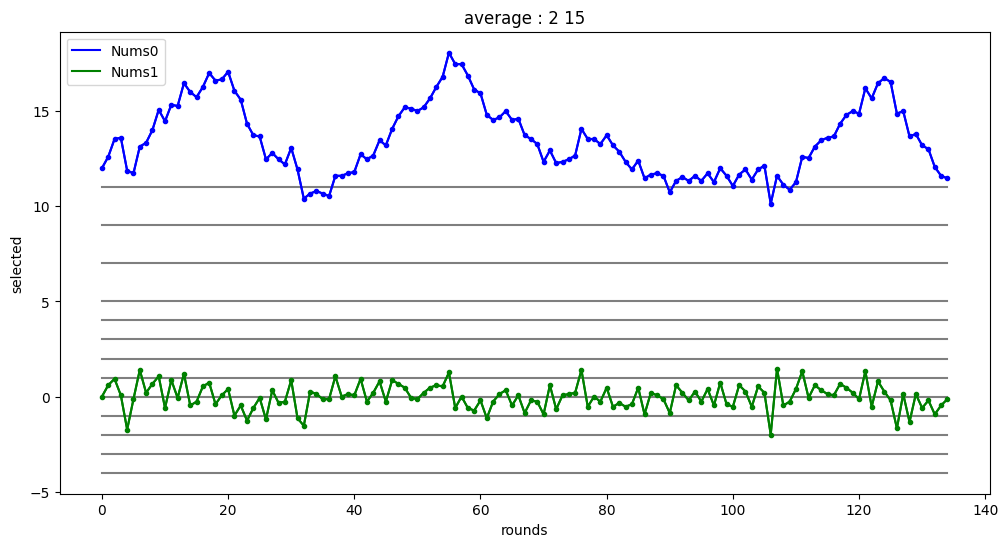

________________________________________
최소값          = [10.9, 10.95, 11.0, 11.05, 11.1]
최대값          = [16.35, 16.35, 16.4, 16.5, 16.6]
마지막          = [14.15, 13.05, 13.05, 12.1, 12.45]


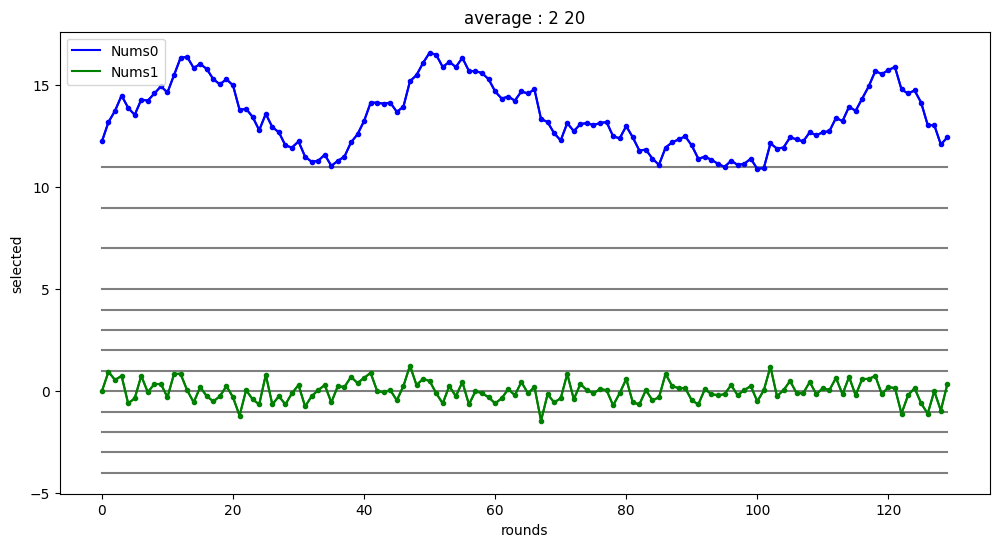

________________________________________
최소값          = [10.8, 10.8, 10.88, 11.08, 11.12]
최대값          = [15.4, 15.48, 15.52, 15.52, 15.56]
마지막          = [14.0, 14.24, 13.28, 13.16, 13.48]


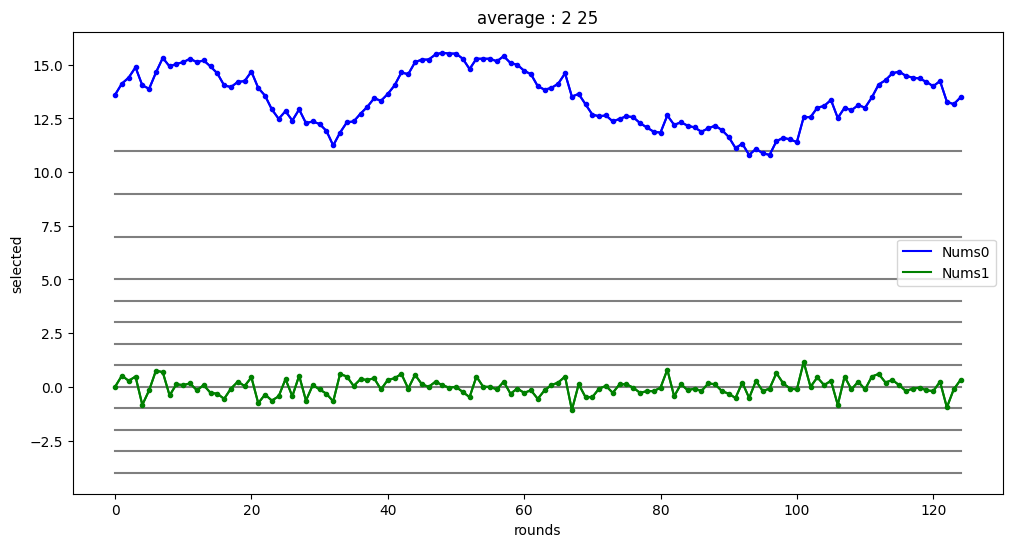

________________________________________
최소값          = [10.733333333333333, 11.233333333333333, 11.233333333333333, 11.3, 11.433333333333334]
최대값          = [15.1, 15.1, 15.2, 15.2, 15.266666666666667]
마지막          = [13.4, 13.333333333333334, 13.2, 13.2, 13.233333333333333]


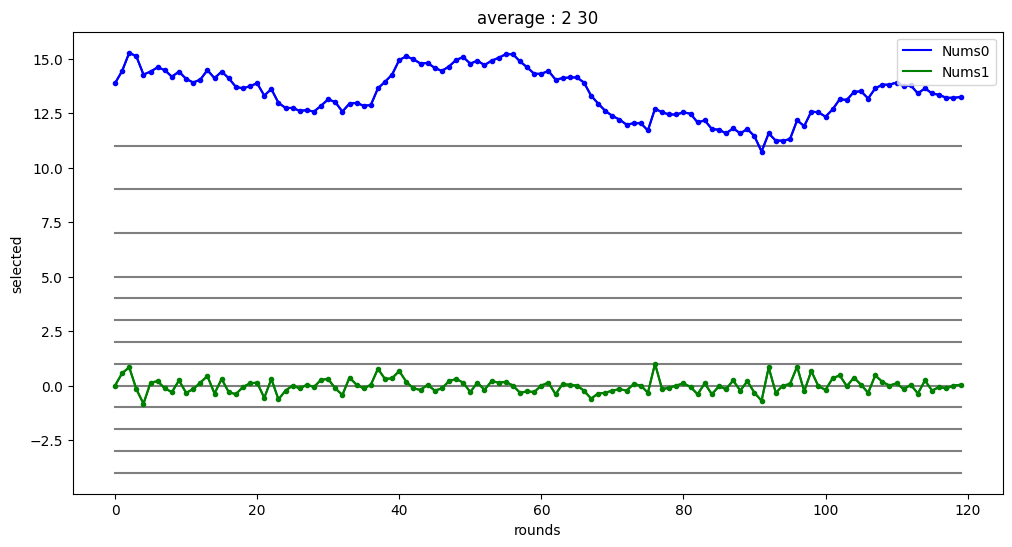

In [30]:
Round = 2
############################
selected = Round - 1
ext_data = predicted_nums_list[selected]
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]
get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

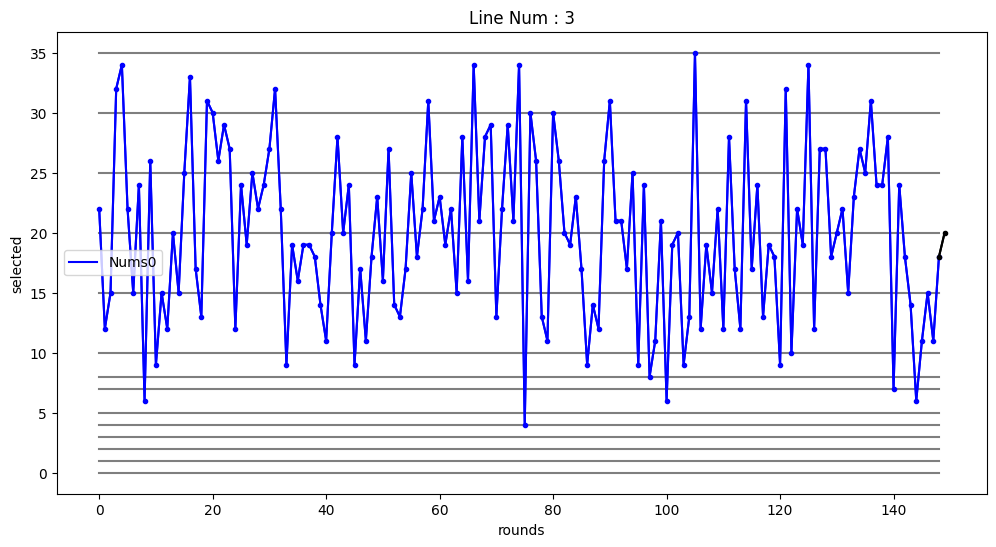

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
최대 값         = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
사용자 선택       = 20
마지막 값        = 18
마지막 값들       = [18, 9, 32, 10, 22, 19, 34, 12, 27, 27, 18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18]
자주 나오는 값(부분) = [(4, 1), (8, 1), (35, 1), (10, 1), (7, 1), (32, 3), (6, 3), (30, 3), (29, 3), (16, 3), (34, 4), (14, 4), (23, 4), (26, 5), (25, 5), (31, 5), (28, 5), (13, 6), (27, 6), (11, 6), (21, 6), (9, 7), (20, 7), (17, 7), (18, 7), (12, 8), (15, 8), (24, 9), (22, 10), (19, 10)]
자주 나오는 값(전체) = [(4, 1), (8, 1), (35, 1), (10, 1), (7, 1), (32, 3), (6, 3), (30, 3), (29, 3), (16, 3), (34, 4), (14, 4), (23, 4), (26, 5), (25, 5), (31, 5), (28, 5), (20, 6), (13, 6), (27, 6), (11, 6), (21, 6), (9, 7), (17, 7), (18, 7), (12, 8), (15, 8), (24, 9), (22, 10), (19, 10)]
마지

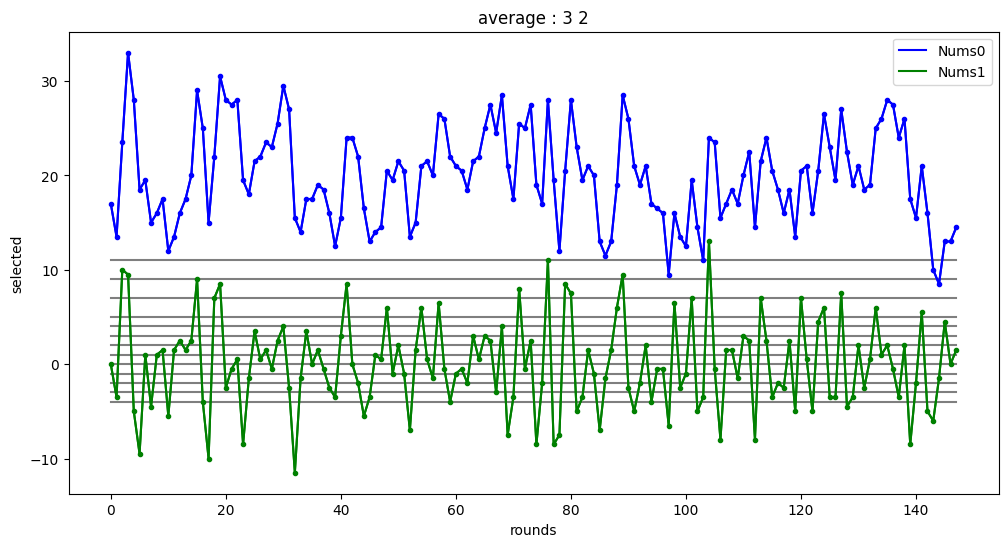

________________________________________
최소값          = [11.4, 12.2, 12.8, 13.0, 13.4]
최대값          = [26.0, 26.0, 26.2, 26.4, 28.6]
마지막          = [13.8, 14.6, 12.8, 11.4, 12.2]


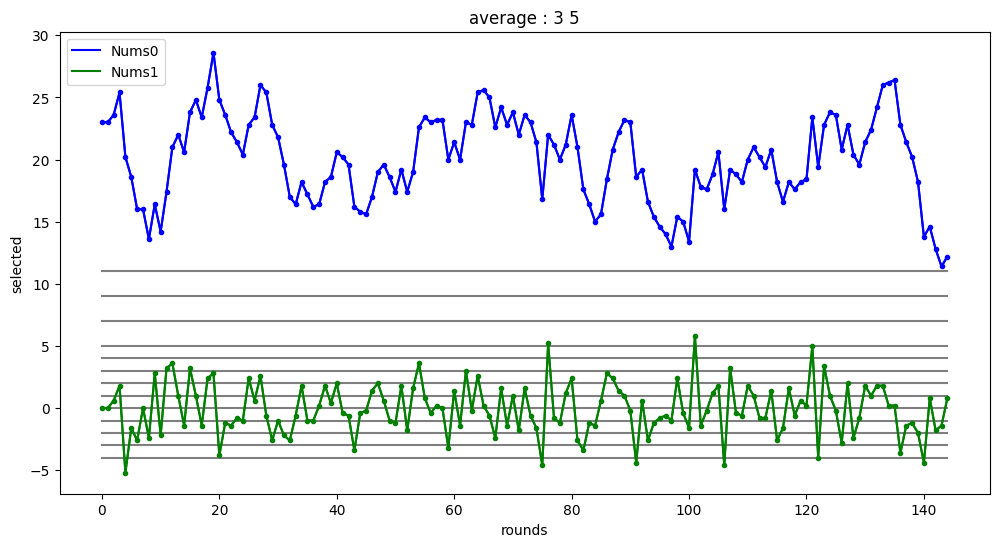

________________________________________
최소값          = [13.25, 13.375, 14.625, 14.75, 14.75]
최대값          = [24.625, 24.625, 24.75, 25.5, 25.75]
마지막          = [18.125, 16.5, 15.375, 13.25, 14.625]


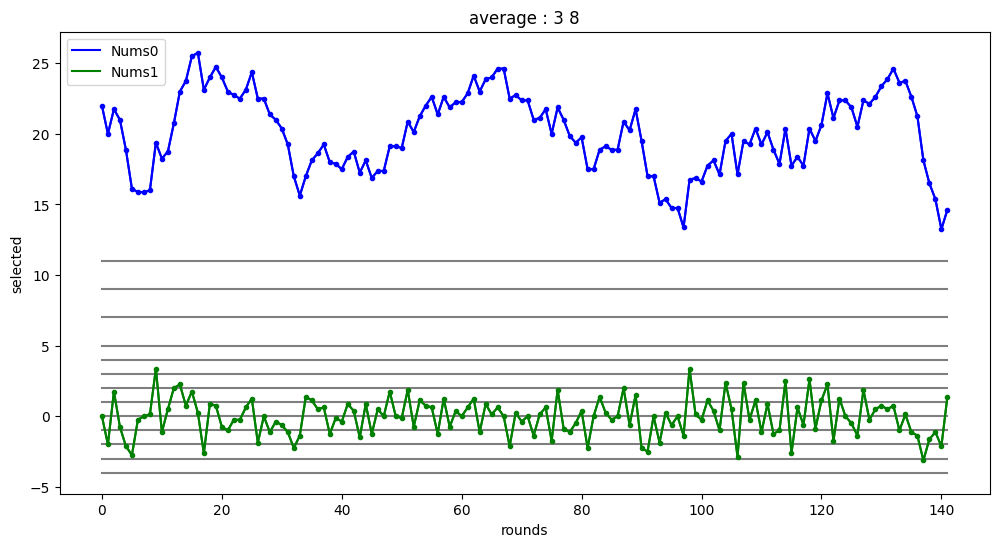

________________________________________
최소값          = [14.0, 15.2, 15.2, 15.4, 15.8]
최대값          = [24.2, 24.3, 24.5, 24.6, 24.7]
마지막          = [20.1, 18.7, 17.1, 15.8, 15.2]


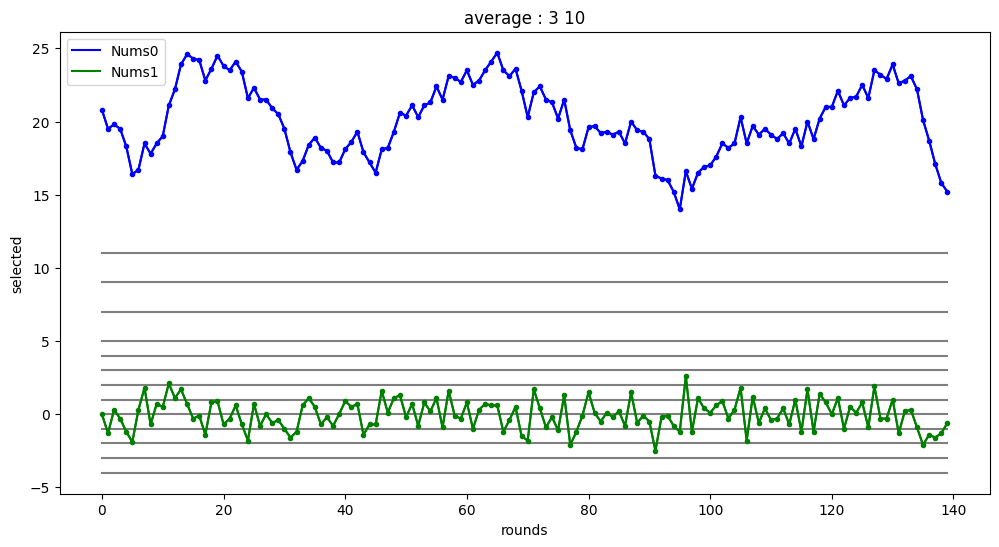

________________________________________
최소값          = [15.615384615384615, 15.846153846153847, 16.153846153846153, 16.23076923076923, 16.307692307692307]
최대값          = [23.923076923076923, 23.923076923076923, 24.0, 24.53846153846154, 25.23076923076923]
마지막          = [20.46153846153846, 20.153846153846153, 19.53846153846154, 18.307692307692307, 17.76923076923077]


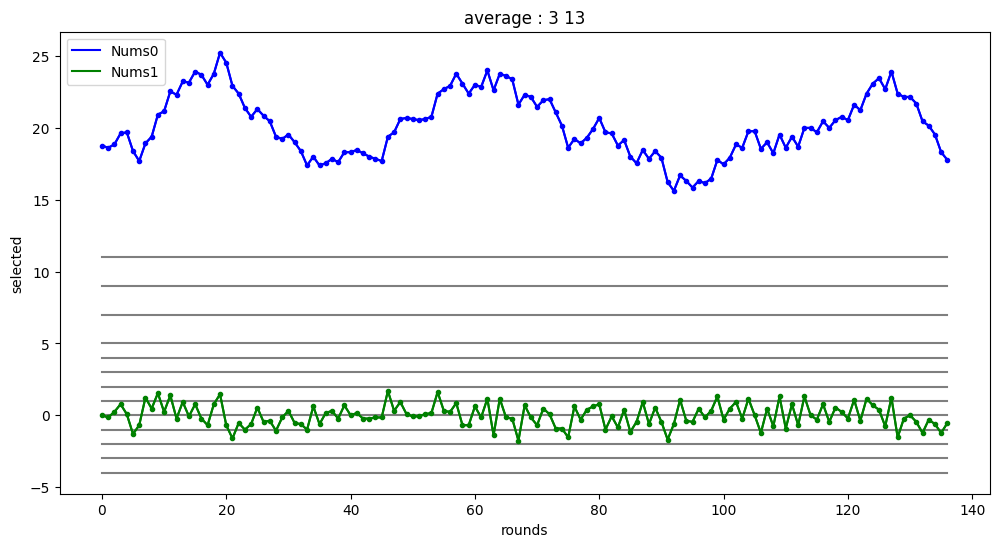

________________________________________
최소값          = [16.2, 16.4, 16.4, 16.533333333333335, 16.666666666666668]
최대값          = [23.8, 23.866666666666667, 23.933333333333334, 23.933333333333334, 24.2]
마지막          = [20.533333333333335, 19.933333333333334, 19.466666666666665, 19.2, 18.866666666666667]


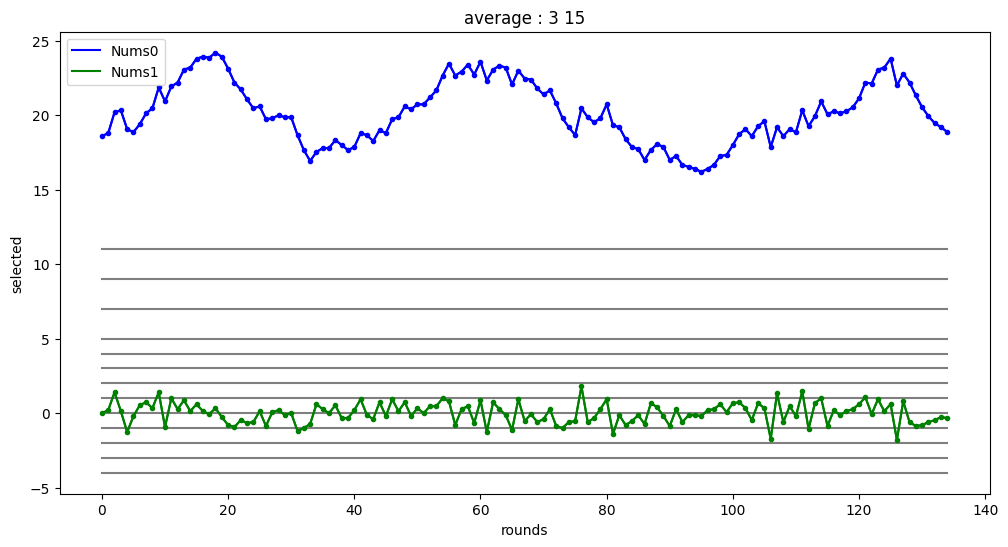

________________________________________
최소값          = [16.65, 16.85, 16.95, 17.1, 17.15]
최대값          = [23.15, 23.3, 23.3, 23.55, 23.65]
마지막          = [21.3, 20.15, 20.3, 19.5, 19.05]


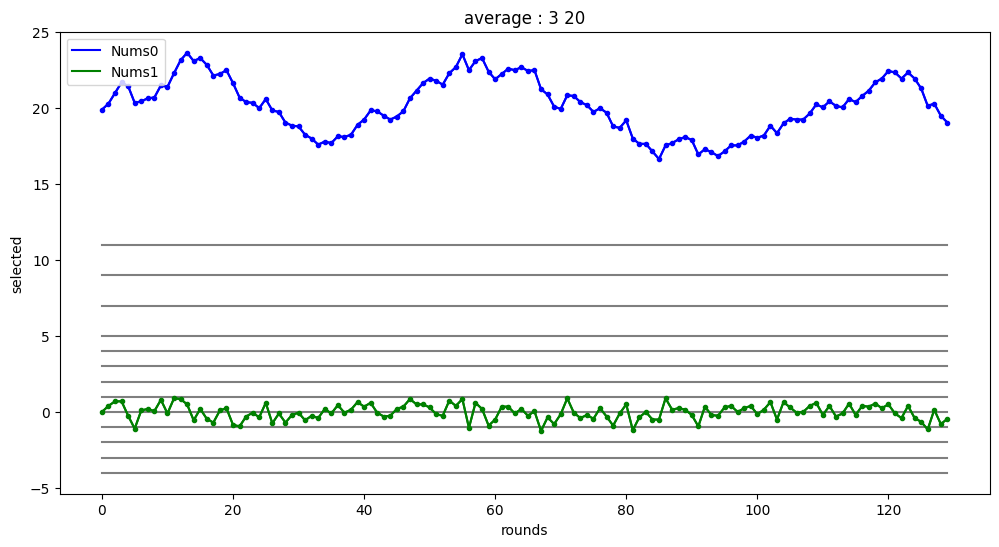

________________________________________
최소값          = [17.24, 17.36, 17.36, 17.44, 17.48]
최대값          = [22.4, 22.44, 22.44, 22.64, 22.72]
마지막          = [20.72, 20.8, 20.12, 20.16, 20.0]


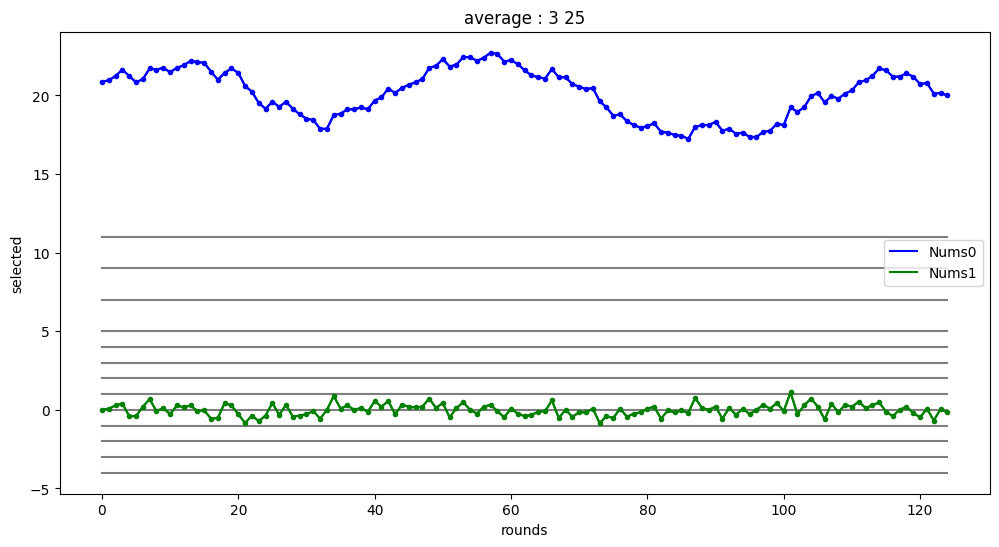

________________________________________
최소값          = [17.533333333333335, 17.566666666666666, 17.566666666666666, 17.6, 17.733333333333334]
최대값          = [22.033333333333335, 22.166666666666668, 22.233333333333334, 22.266666666666666, 22.433333333333334]
마지막          = [20.3, 20.1, 19.8, 19.733333333333334, 19.7]


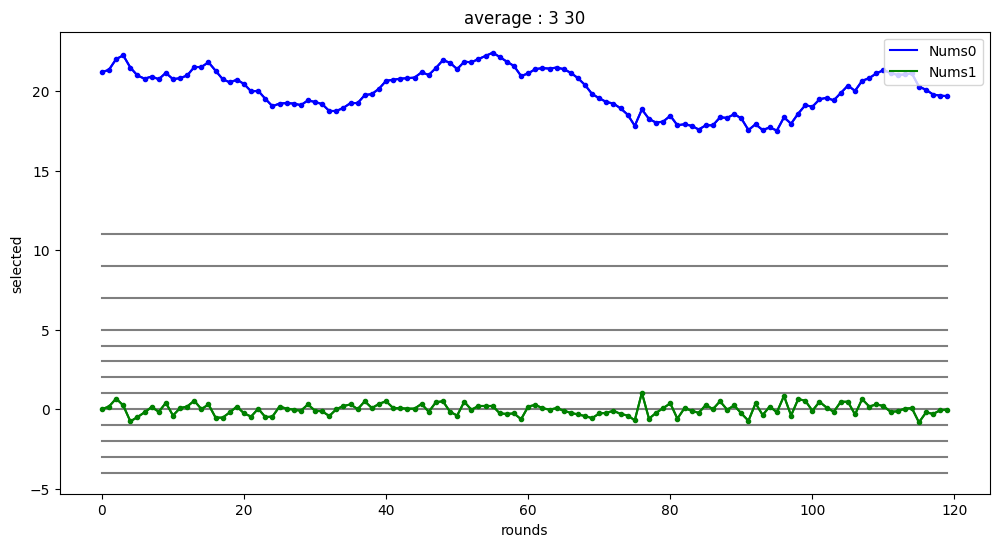

In [31]:
Round = 3
############################
selected = Round - 1
ext_data = predicted_nums_list[selected]
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]
get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

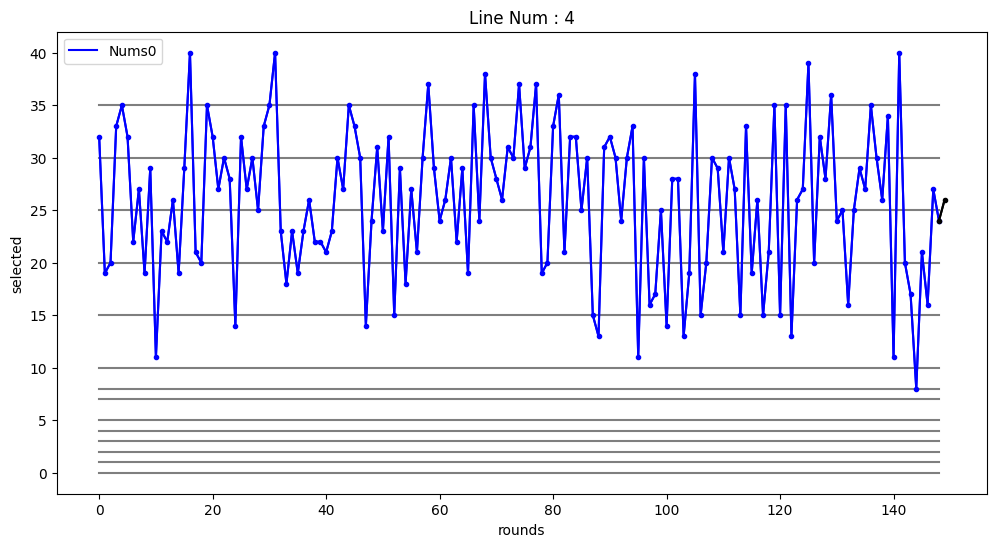

최소 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
최대 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택       = 26
마지막 값        = 24
마지막 값들       = [35, 15, 35, 13, 26, 27, 39, 20, 32, 28, 36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24]
자주 나오는 값(부분) = [(39, 1), (34, 1), (8, 1), (18, 2), (38, 2), (36, 2), (17, 2), (11, 3), (40, 3), (14, 3), (37, 3), (13, 3), (16, 3), (31, 4), (22, 5), (28, 5), (25, 5), (20, 6), (33, 6), (23, 6), (24, 6), (15, 6), (21, 7), (19, 8), (35, 8), (29, 8), (26, 8), (32, 9), (27, 9), (30, 15)]
자주 나오는 값(전체) = [(39, 1), (34, 1), (8, 1), (18, 2), (38, 2), (36, 2), (17, 2), (11, 3), (40, 3), (14, 3), (37, 3), (13, 3), (16, 3), (31, 4), (22, 5), (28, 5), (25, 5), (20, 6), (33, 6), (23, 6), (24, 6), (15, 6), (26, 7), (21, 7), (19, 8), (35, 8), (29, 8), (32, 9), (27, 9

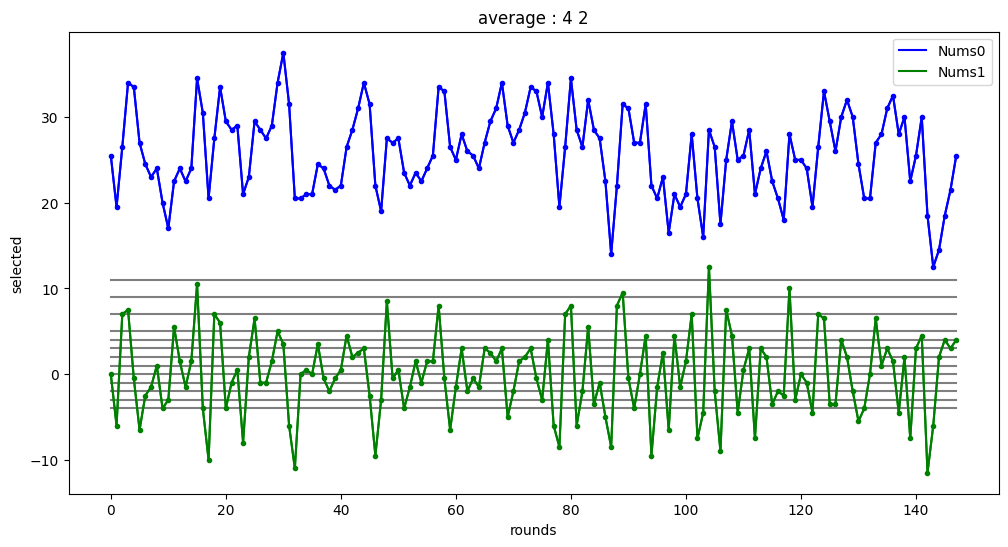

________________________________________
최소값          = [16.4, 17.8, 19.2, 19.2, 19.8]
최대값          = [31.0, 31.2, 31.6, 32.6, 32.8]
마지막          = [19.2, 21.2, 16.4, 17.8, 19.2]


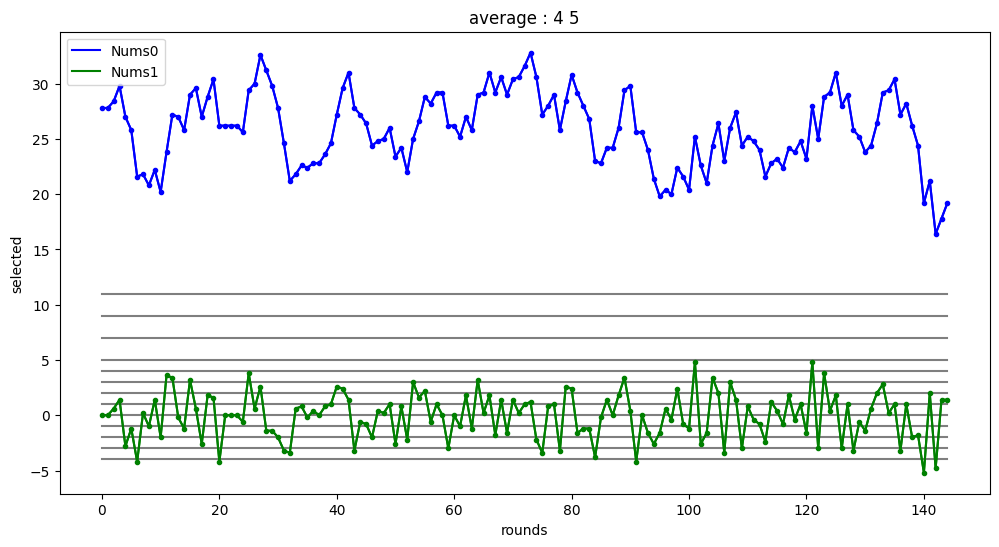

________________________________________
최소값          = [20.0, 20.0, 20.875, 21.125, 21.375]
최대값          = [30.25, 30.5, 30.625, 31.125, 31.125]
마지막          = [23.25, 22.125, 20.875, 20.0, 21.625]


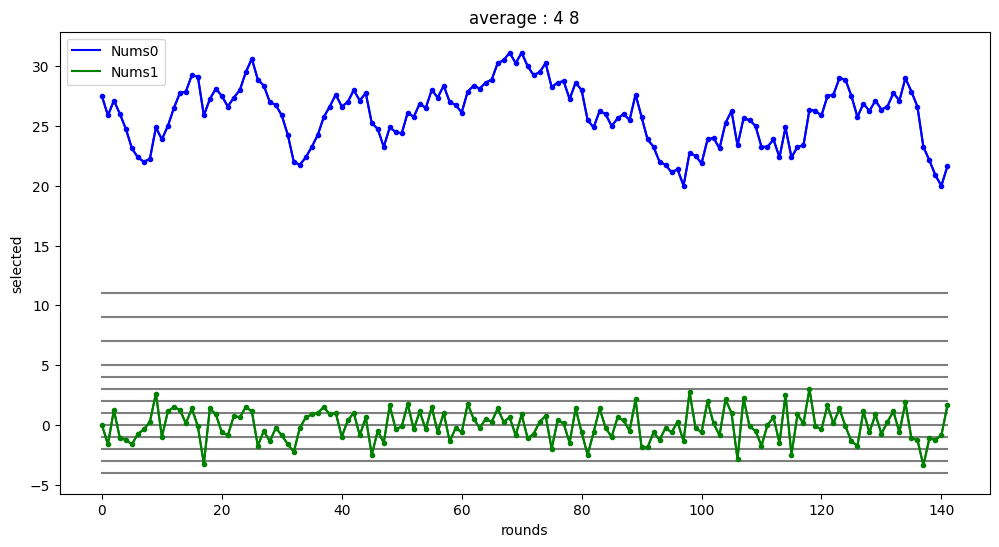

________________________________________
최소값          = [20.1, 21.3, 21.5, 21.7, 21.8]
최대값          = [29.8, 30.3, 30.4, 30.8, 31.7]
마지막          = [24.8, 24.2, 22.3, 22.0, 21.8]


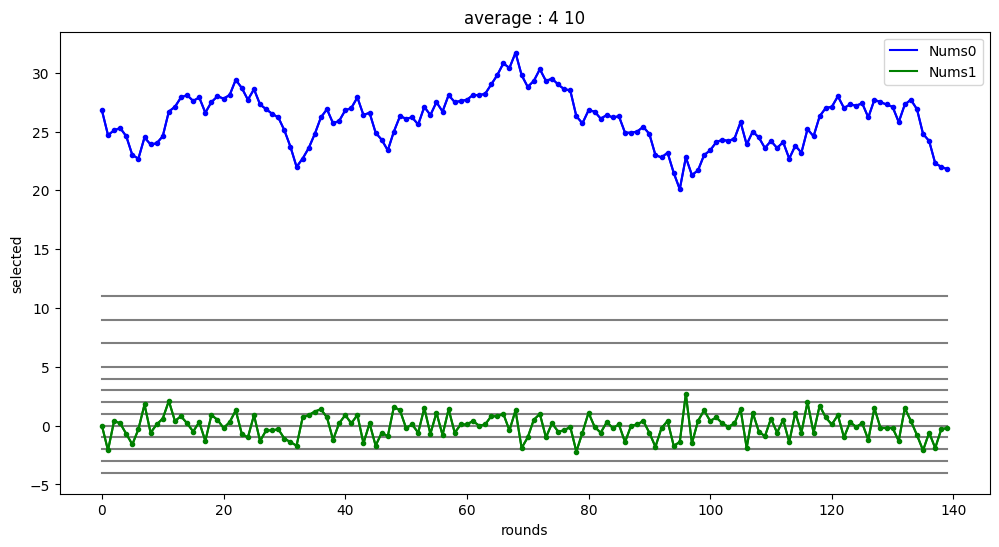

________________________________________
최소값          = [21.076923076923077, 22.076923076923077, 22.153846153846153, 22.46153846153846, 22.53846153846154]
최대값          = [29.846153846153847, 29.846153846153847, 29.923076923076923, 30.384615384615383, 30.384615384615383]
마지막          = [24.46153846153846, 24.846153846153847, 24.153846153846153, 24.0, 23.76923076923077]


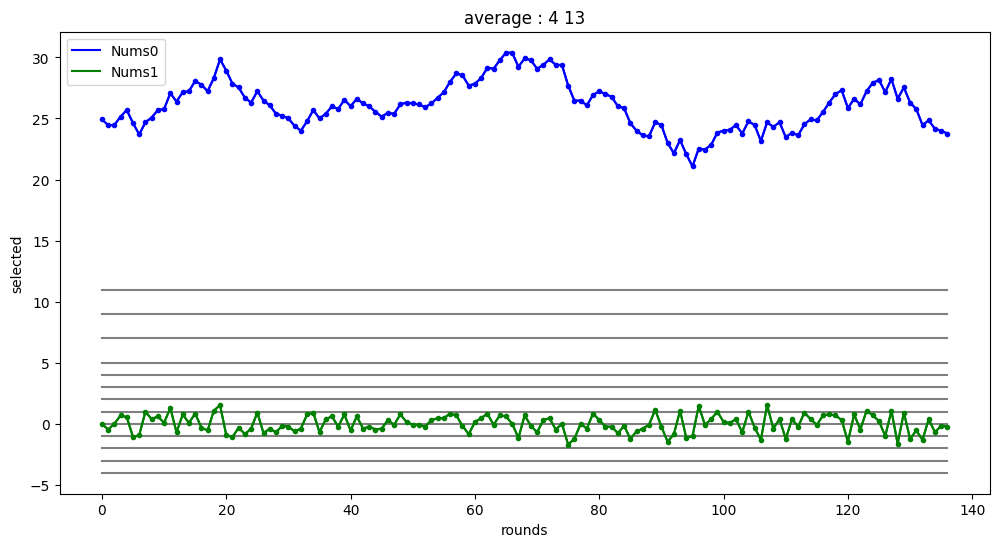

________________________________________
최소값          = [22.2, 22.466666666666665, 22.466666666666665, 22.733333333333334, 22.866666666666667]
최대값          = [29.533333333333335, 29.733333333333334, 29.733333333333334, 29.866666666666667, 29.933333333333334]
마지막          = [24.466666666666665, 24.266666666666666, 23.666666666666668, 24.4, 24.333333333333332]


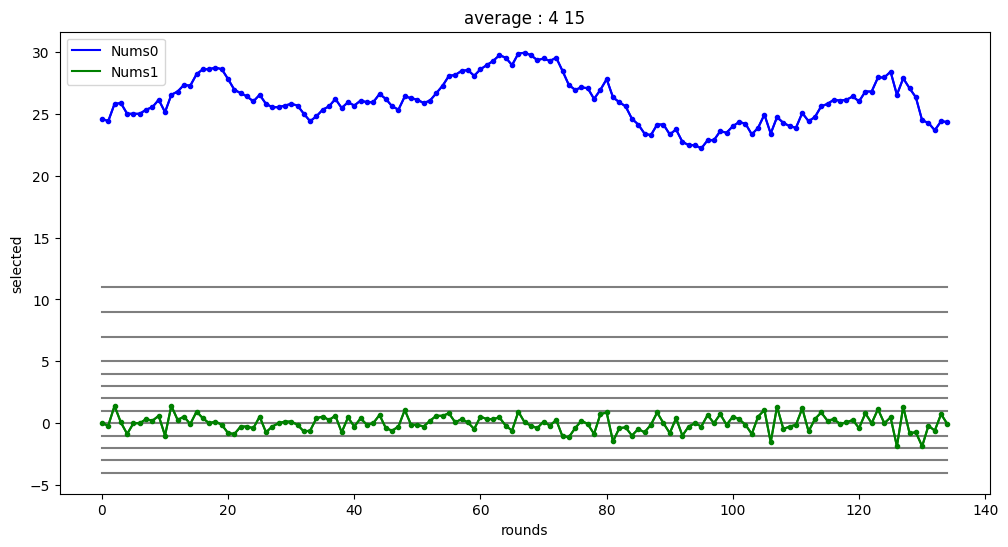

________________________________________
최소값          = [22.95, 22.95, 23.1, 23.1, 23.15]
최대값          = [29.25, 29.4, 29.45, 29.6, 29.7]
마지막          = [26.1, 25.2, 25.0, 24.75, 24.55]


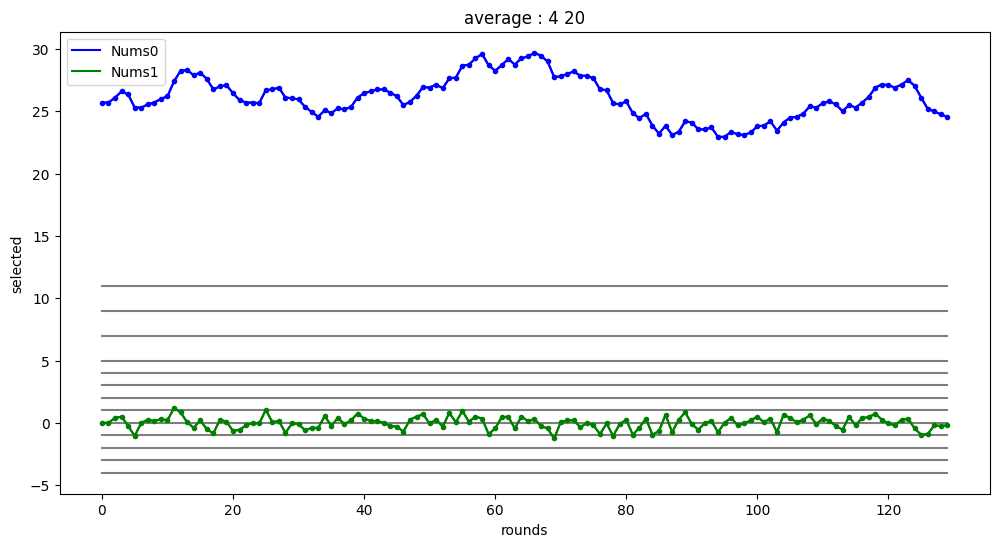

________________________________________
최소값          = [22.92, 23.0, 23.16, 23.24, 23.28]
최대값          = [28.76, 28.8, 28.84, 28.96, 29.2]
마지막          = [25.52, 25.76, 25.0, 25.56, 25.48]


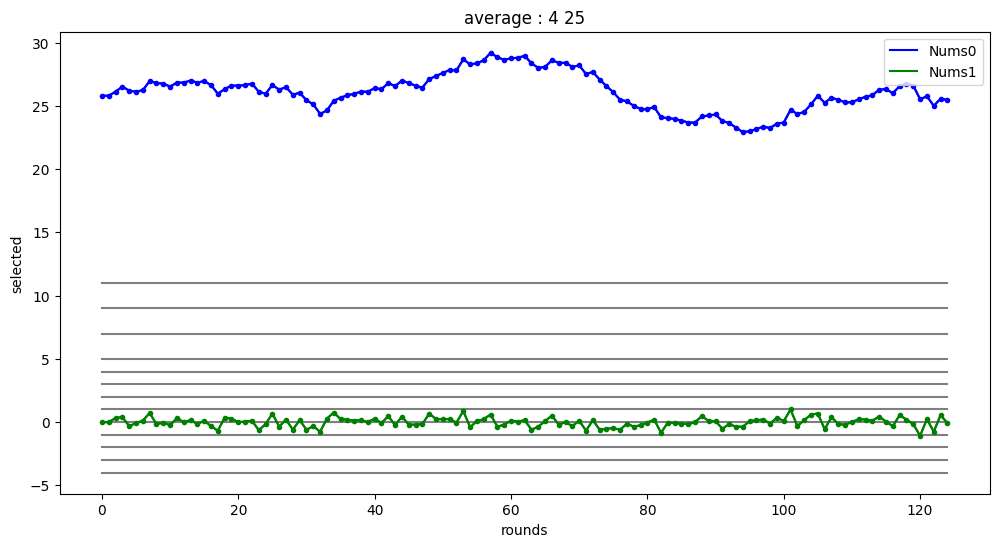

________________________________________
최소값          = [23.033333333333335, 23.233333333333334, 23.366666666666667, 23.566666666666666, 23.633333333333333]
최대값          = [28.366666666666667, 28.5, 28.7, 28.766666666666666, 29.0]
마지막          = [25.133333333333333, 25.2, 24.866666666666667, 25.266666666666666, 25.366666666666667]


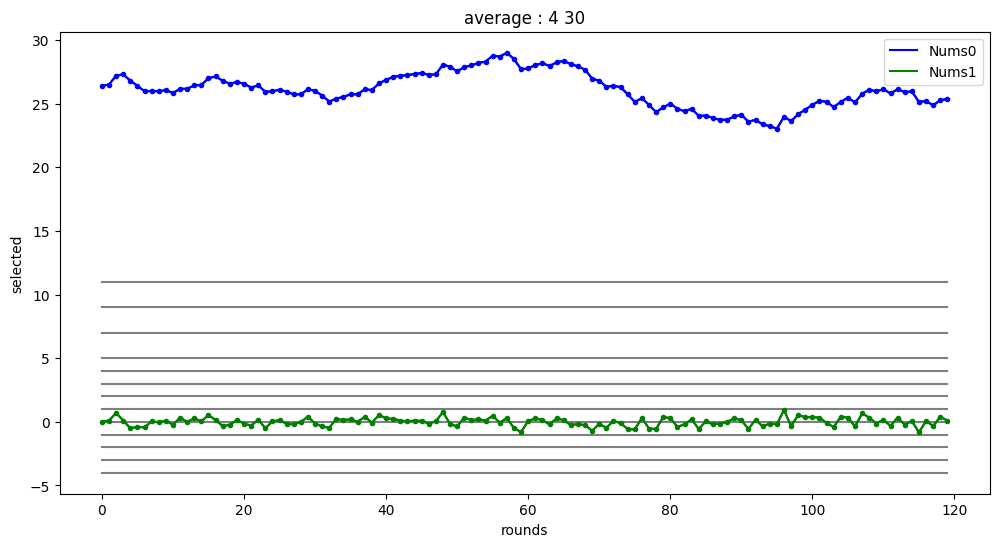

In [32]:
Round = 4
############################
selected = Round - 1
ext_data = predicted_nums_list[selected]
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]
get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

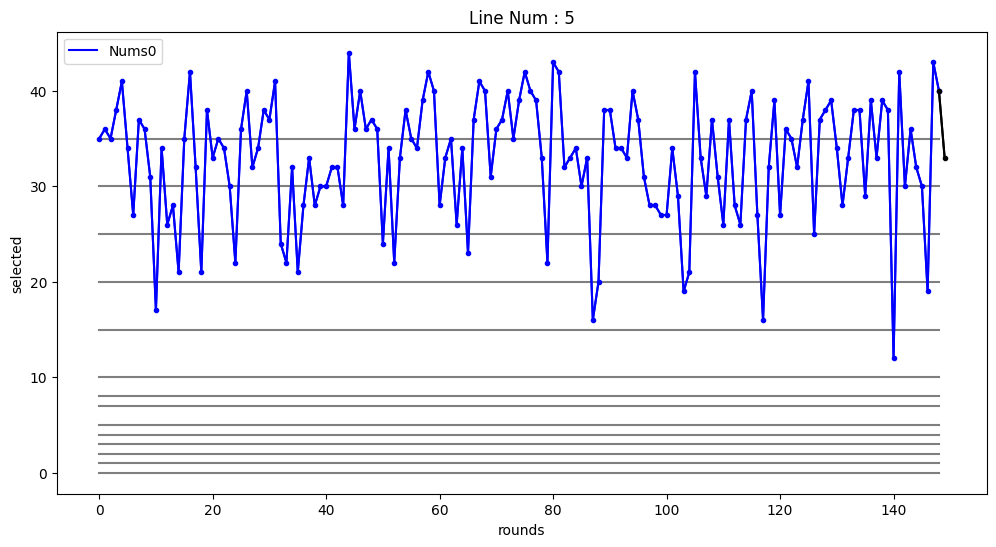

최소 값         = [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
최대 값         = [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
사용자 선택       = 33
마지막 값        = 40
마지막 값들       = [39, 27, 36, 35, 32, 37, 41, 25, 37, 38, 39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40]
자주 나오는 값(부분) = [(17, 1), (44, 1), (23, 1), (20, 1), (25, 1), (12, 1), (24, 2), (43, 2), (16, 2), (19, 2), (29, 3), (41, 4), (31, 4), (26, 4), (21, 4), (22, 4), (27, 5), (42, 6), (30, 6), (39, 7), (35, 8), (36, 9), (28, 9), (32, 9), (40, 9), (38, 10), (37, 11), (34, 12), (33, 12)]
자주 나오는 값(전체) = [(17, 1), (44, 1), (23, 1), (20, 1), (25, 1), (12, 1), (24, 2), (43, 2), (16, 2), (19, 2), (29, 3), (41, 4), (31, 4), (26, 4), (21, 4), (22, 4), (27, 5), (42, 6), (30, 6), (39, 7), (35, 8), (36, 9), (28, 9), (32, 9), (40, 9), (38, 10), (37, 11), (33, 11), (34, 12)]
마지

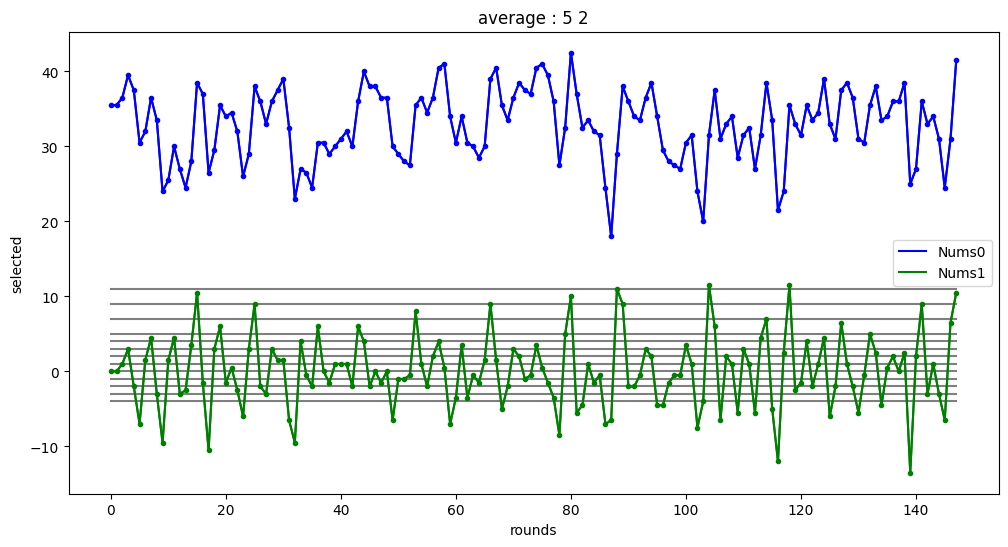

________________________________________
최소값          = [25.2, 25.4, 26.0, 26.6, 27.2]
최대값          = [38.6, 38.6, 38.6, 39.0, 39.2]
마지막          = [30.4, 34.0, 29.4, 32.0, 32.8]


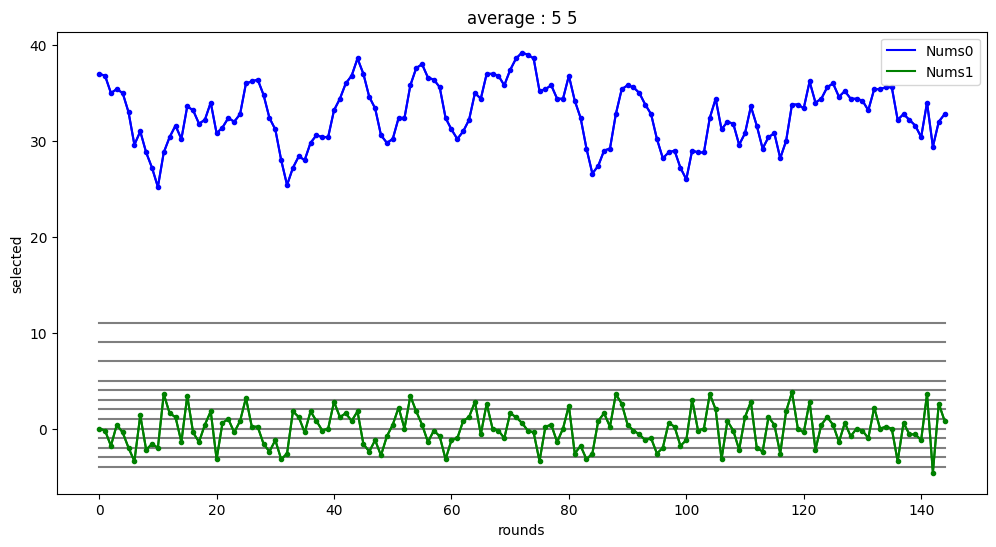

________________________________________
최소값          = [26.625, 27.25, 27.875, 28.0, 28.375]
최대값          = [37.5, 37.5, 37.5, 38.125, 38.5]
마지막          = [32.75, 32.375, 29.875, 30.5, 34.0]


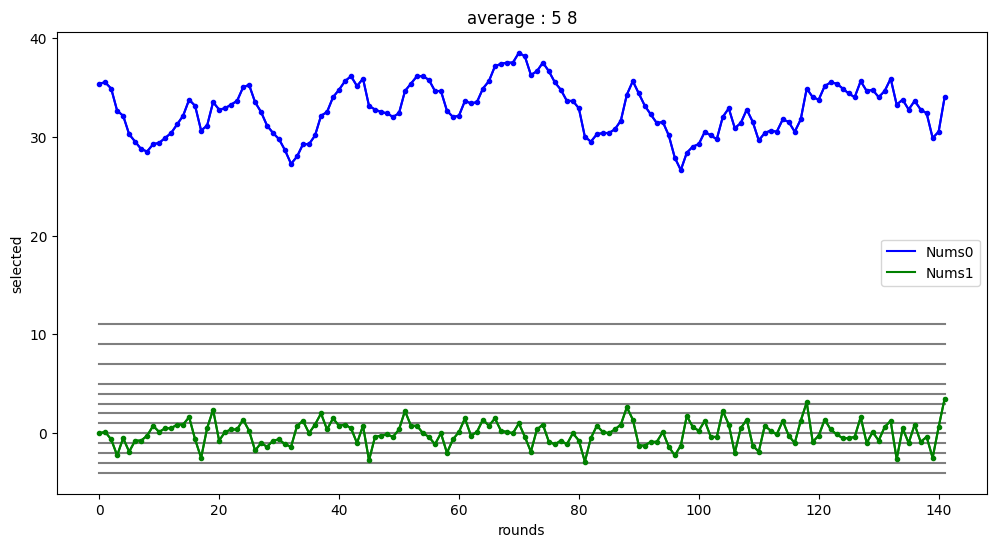

________________________________________
최소값          = [28.0, 28.1, 28.6, 28.7, 28.8]
최대값          = [37.2, 37.5, 37.8, 37.9, 38.1]
마지막          = [33.0, 33.1, 31.1, 32.1, 32.2]


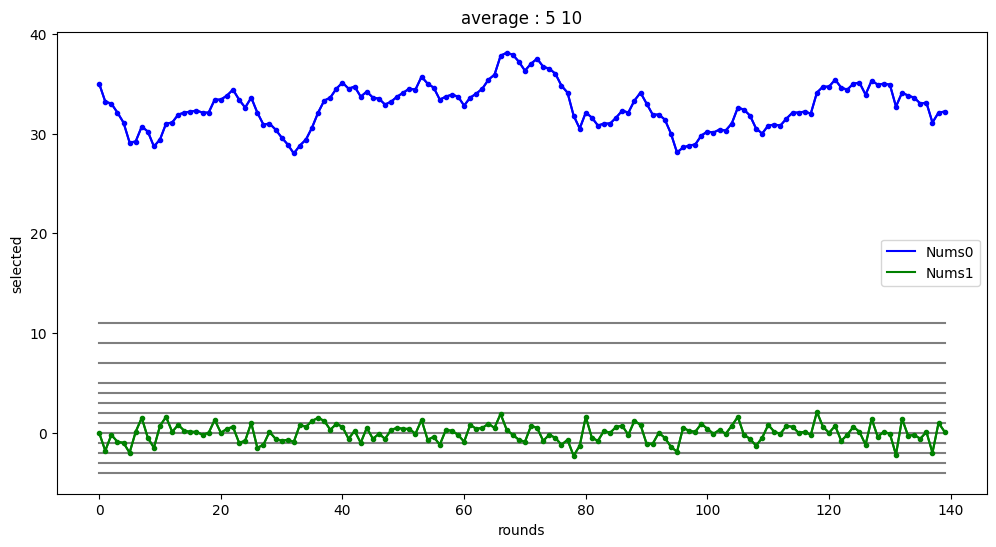

________________________________________
최소값          = [29.307692307692307, 29.46153846153846, 29.53846153846154, 29.615384615384617, 29.615384615384617]
최대값          = [36.69230769230769, 36.84615384615385, 36.92307692307692, 36.92307692307692, 37.69230769230769]
마지막          = [33.76923076923077, 33.53846153846154, 32.07692307692308, 32.46153846153846, 33.30769230769231]


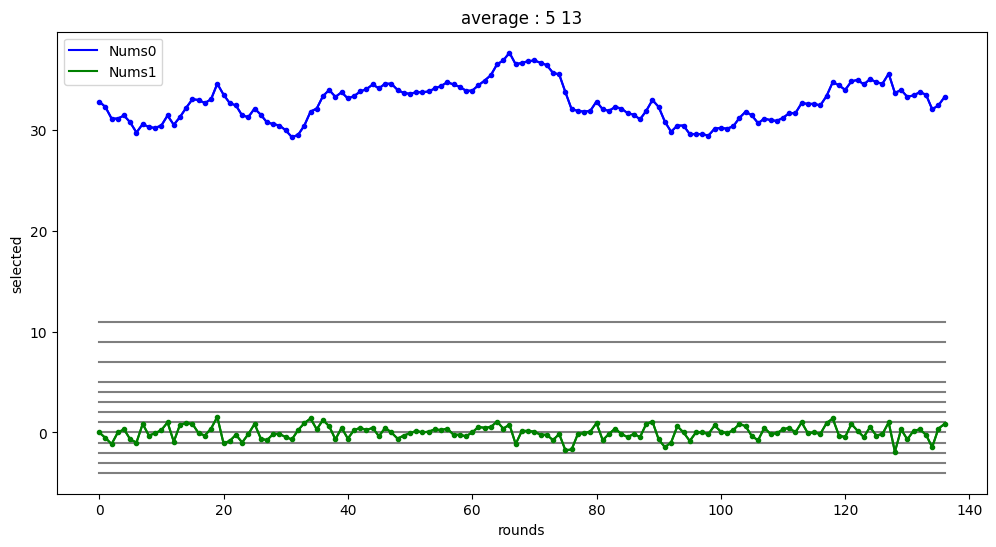

________________________________________
최소값          = [29.466666666666665, 29.733333333333334, 29.866666666666667, 29.866666666666667, 29.866666666666667]
최대값          = [36.46666666666667, 36.46666666666667, 36.733333333333334, 37.0, 37.333333333333336]
마지막          = [33.4, 33.13333333333333, 32.53333333333333, 33.2, 33.333333333333336]


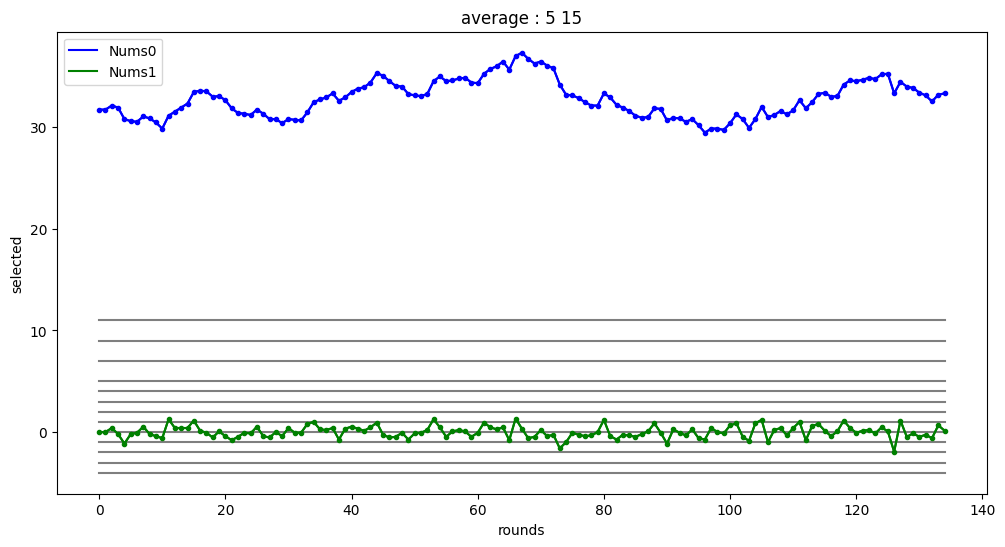

________________________________________
최소값          = [29.7, 29.85, 29.9, 30.3, 30.35]
최대값          = [35.9, 35.95, 35.95, 36.1, 36.3]
마지막          = [34.05, 33.5, 33.2, 33.5, 33.6]


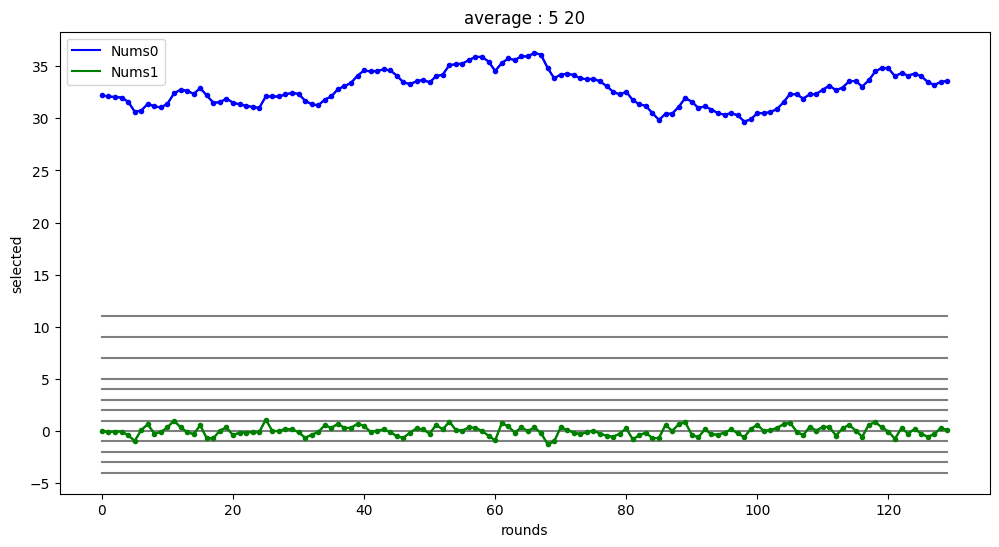

________________________________________
최소값          = [30.04, 30.24, 30.44, 30.48, 30.52]
최대값          = [35.56, 35.6, 35.88, 35.88, 35.88]
마지막          = [33.92, 34.04, 33.36, 33.68, 34.0]


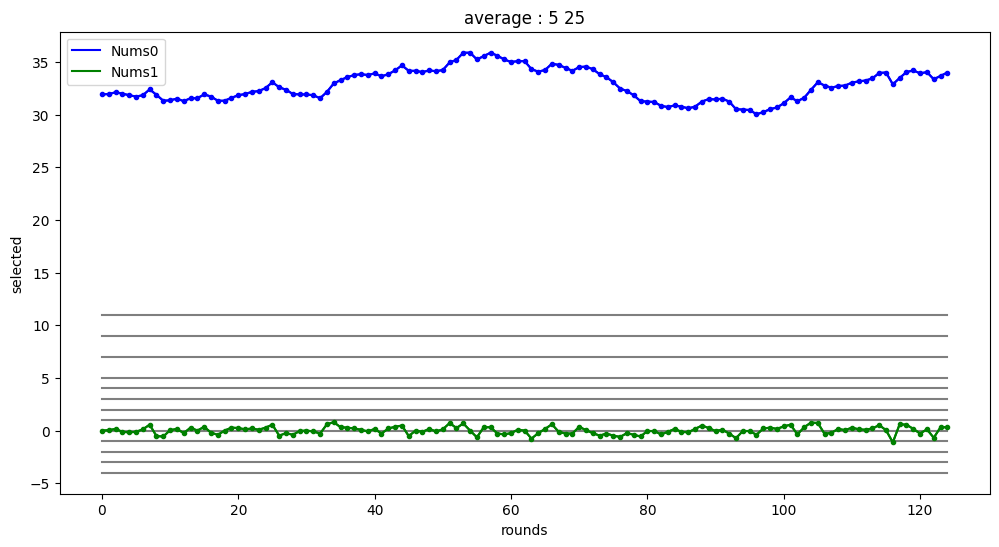

________________________________________
최소값          = [30.666666666666668, 30.766666666666666, 30.8, 30.833333333333332, 30.866666666666667]
최대값          = [35.3, 35.333333333333336, 35.5, 35.63333333333333, 35.63333333333333]
마지막          = [33.4, 33.06666666666667, 32.8, 33.7, 33.96666666666667]


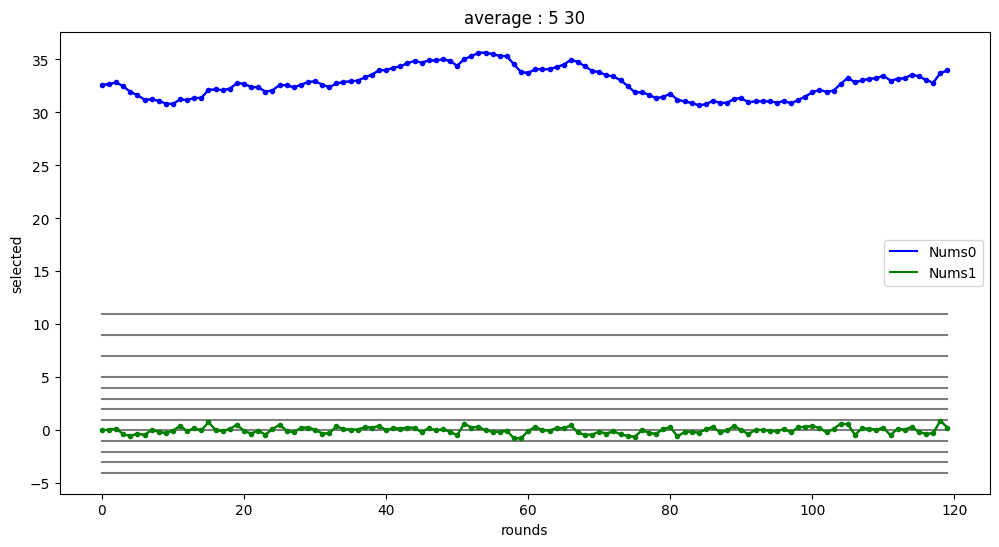

In [33]:
Round = 5
############################
selected = Round - 1
ext_data = predicted_nums_list[selected]
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

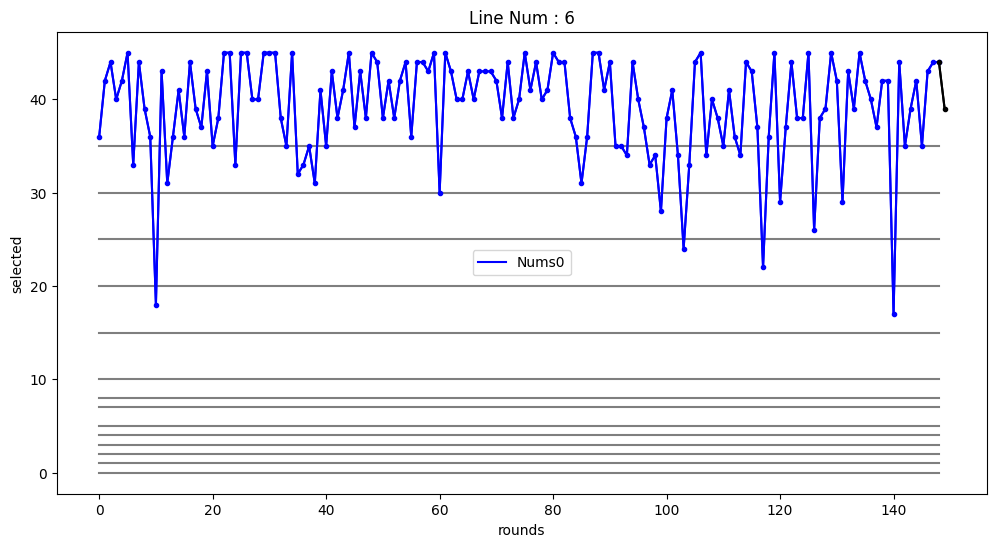

최소 값         = [17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
최대 값         = [17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
사용자 선택       = 39
마지막 값        = 44
마지막 값들       = [45, 29, 37, 44, 38, 38, 45, 26, 38, 39, 45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44]
자주 나오는 값(부분) = [(18, 1), (32, 1), (30, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (29, 2), (31, 3), (33, 5), (34, 5), (39, 6), (37, 6), (41, 8), (36, 9), (35, 9), (42, 10), (40, 11), (43, 13), (38, 14), (44, 19), (45, 22)]
자주 나오는 값(전체) = [(18, 1), (32, 1), (30, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (29, 2), (31, 3), (33, 5), (39, 5), (34, 5), (37, 6), (41, 8), (36, 9), (35, 9), (42, 10), (40, 11), (43, 13), (38, 14), (44, 19), (45, 22)]
마지막 수의 앞과 뒤  = [[42, 44, 40], [33, 44, 39], [36, 44, 39], [45, 44, 38], [42, 44, 36], [36, 44, 44], [44, 44, 43], [38, 44, 38], [41, 44, 40], [45, 44, 44]

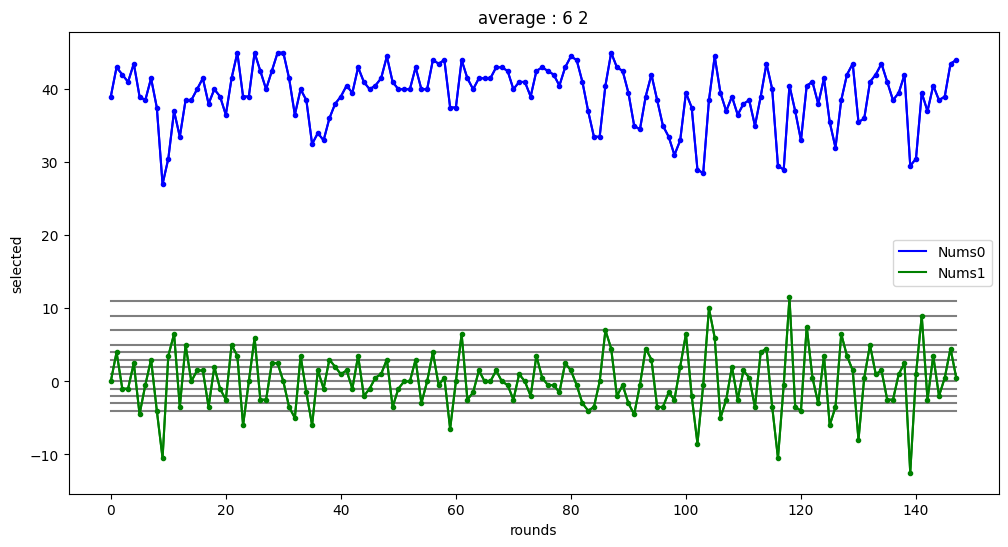

________________________________________
최소값          = [32.8, 33.0, 33.4, 33.8, 33.8]
최대값          = [42.8, 42.8, 43.0, 43.0, 43.0]
마지막          = [35.4, 39.0, 38.8, 40.6, 41.6]


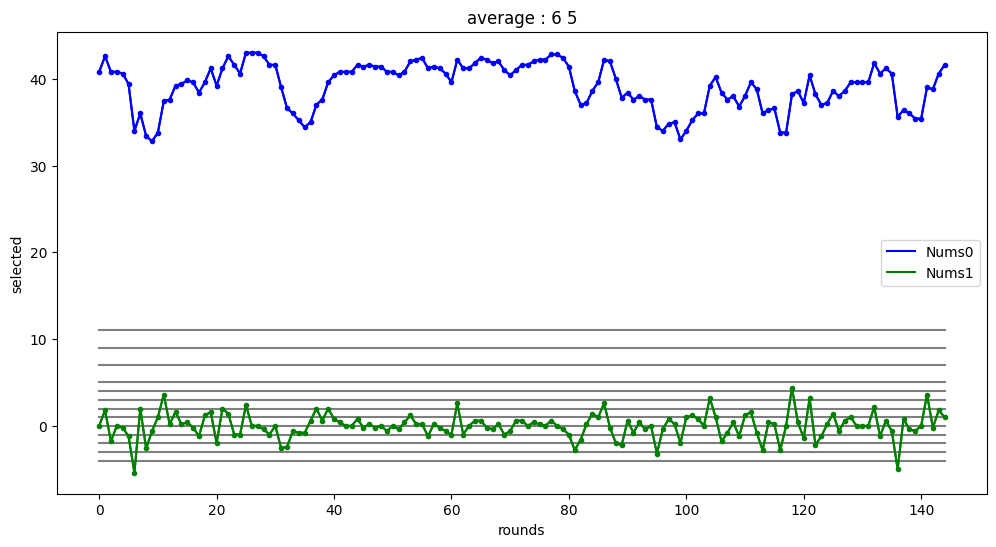

________________________________________
최소값          = [33.125, 33.625, 34.5, 35.0, 35.0]
최대값          = [42.25, 42.25, 42.5, 42.875, 43.0]
마지막          = [37.25, 37.0, 37.125, 37.375, 40.75]


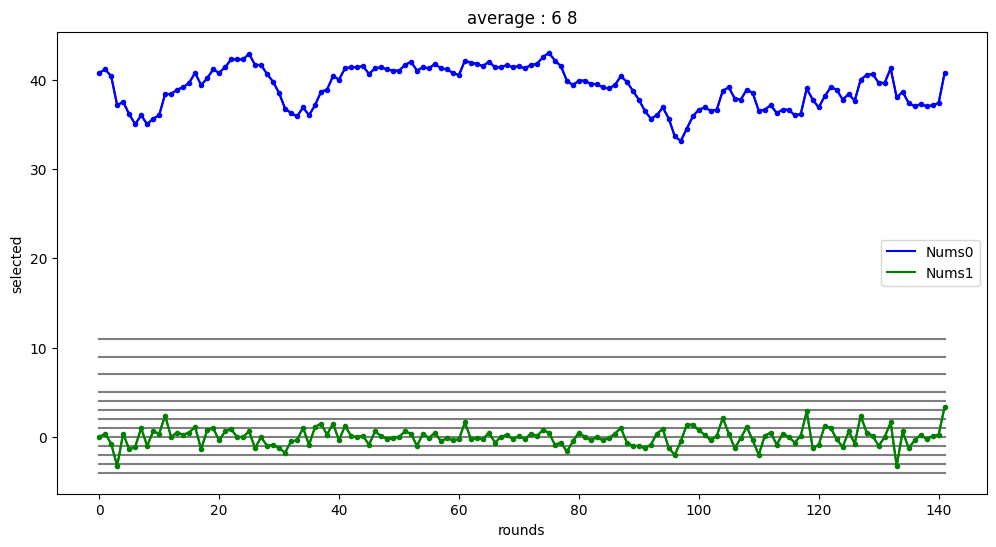

________________________________________
최소값          = [34.2, 34.6, 35.3, 35.4, 35.5]
최대값          = [42.2, 42.2, 42.2, 42.3, 42.8]
마지막          = [38.0, 37.3, 37.6, 38.3, 38.5]


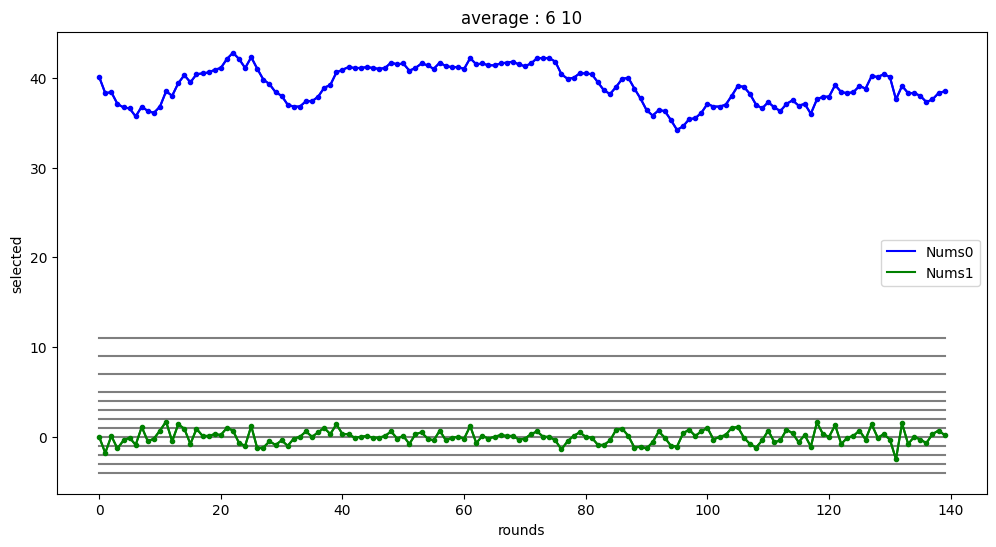

________________________________________
최소값          = [35.0, 35.15384615384615, 35.69230769230769, 35.76923076923077, 35.76923076923077]
최대값          = [41.84615384615385, 41.84615384615385, 41.92307692307692, 42.0, 42.0]
마지막          = [39.0, 38.38461538461539, 38.69230769230769, 38.61538461538461, 38.76923076923077]


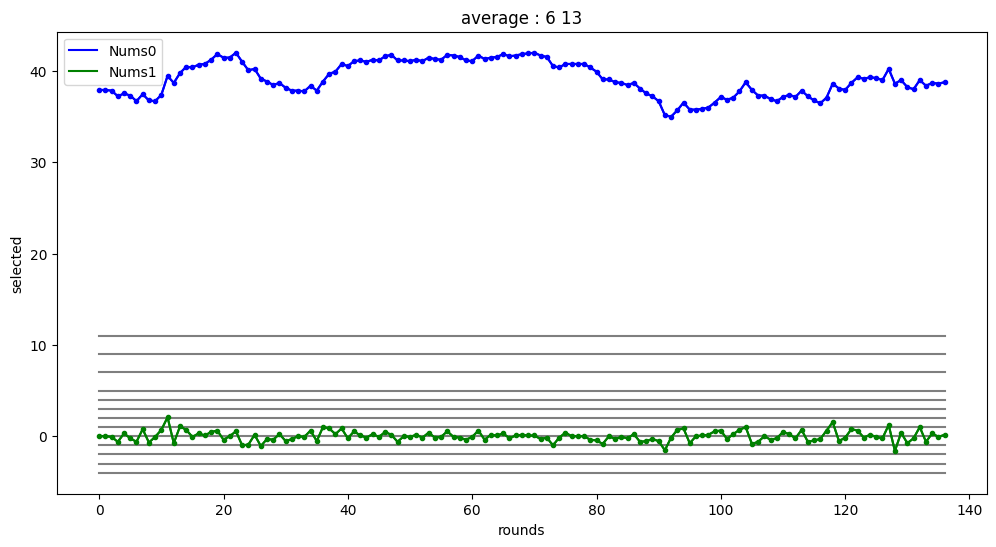

________________________________________
최소값          = [35.6, 35.6, 35.86666666666667, 36.13333333333333, 36.13333333333333]
최대값          = [41.8, 41.8, 41.86666666666667, 42.06666666666667, 42.13333333333333]
마지막          = [38.53333333333333, 38.06666666666667, 39.0, 39.06666666666667, 39.4]


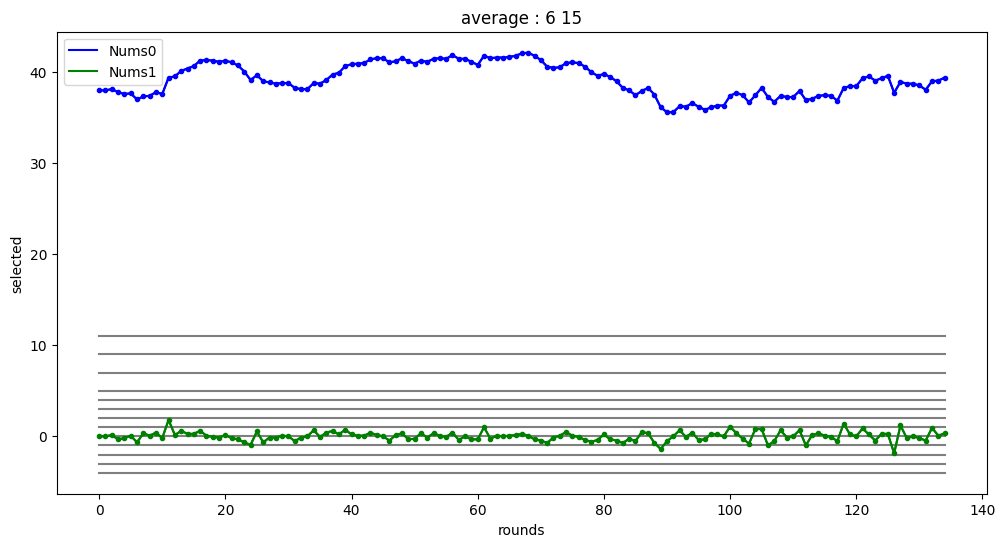

________________________________________
최소값          = [36.25, 36.3, 36.35, 36.55, 36.6]
최대값          = [41.65, 41.8, 41.85, 41.9, 41.9]
마지막          = [38.55, 38.05, 38.9, 39.2, 39.45]


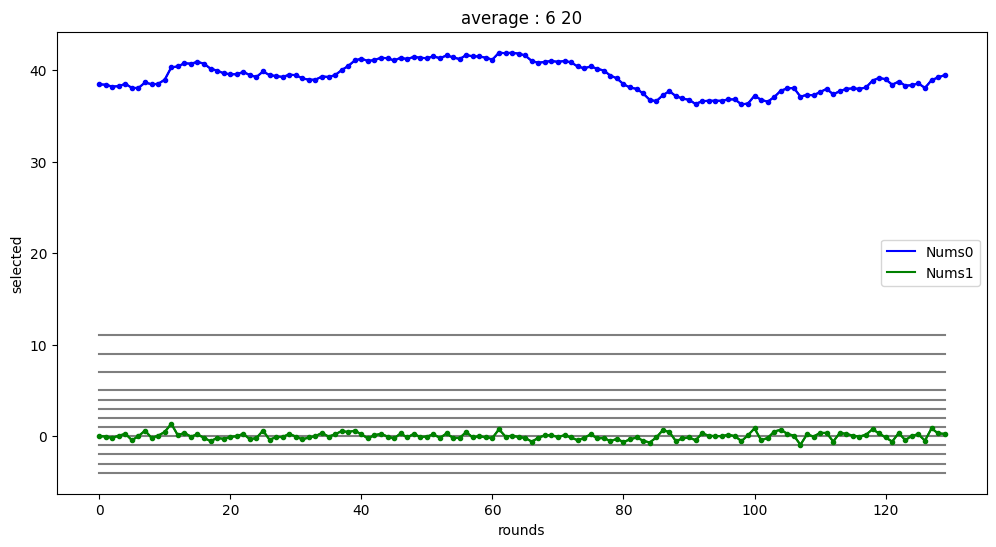

________________________________________
최소값          = [36.2, 36.2, 36.52, 36.6, 36.64]
최대값          = [41.56, 41.6, 41.76, 41.76, 41.76]
마지막          = [38.28, 38.52, 38.76, 38.76, 39.0]


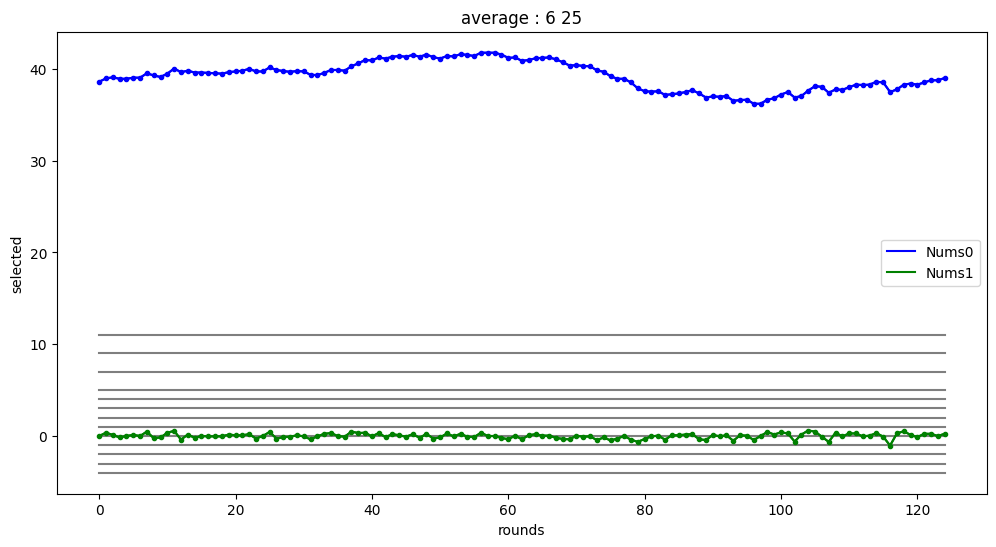

________________________________________
최소값          = [36.43333333333333, 36.5, 36.53333333333333, 36.7, 36.733333333333334]
최대값          = [41.53333333333333, 41.56666666666667, 41.6, 41.666666666666664, 41.8]
마지막          = [38.0, 37.733333333333334, 37.93333333333333, 38.666666666666664, 38.93333333333333]


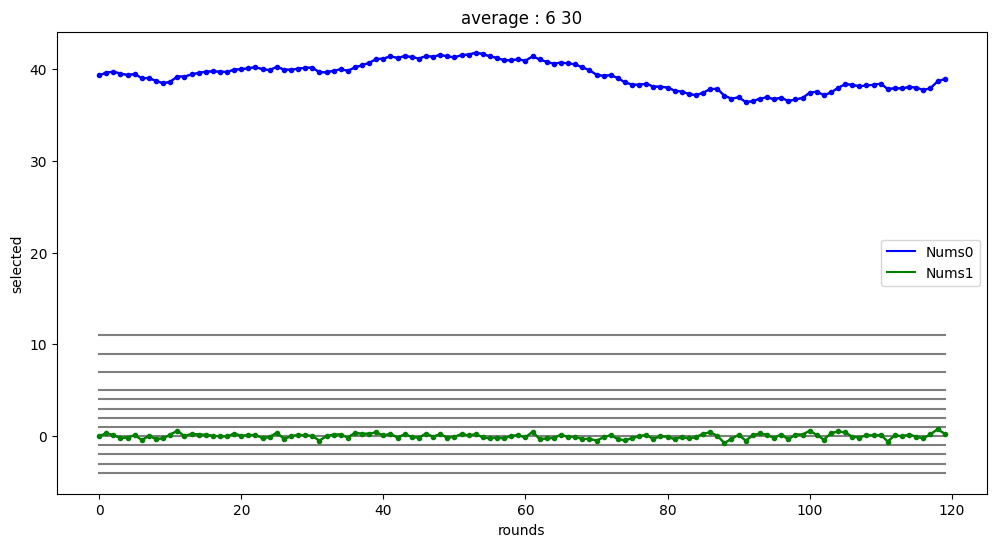

In [37]:
Round = 6
############################
selected = Round - 1
ext_data = predicted_nums_list[selected]
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

In [44]:
print(predicted_nums_list)
print(predicted_nums)

[7, 13, 20, 26, 33, 39]
{0: array([[7.29986]], dtype=float32), 1: array([[13.28232]], dtype=float32), 2: array([[19.887342]], dtype=float32), 3: array([[25.81733]], dtype=float32), 4: array([[32.65308]], dtype=float32), 5: array([[39.15555]], dtype=float32)}


In [ ]:
# 4
candidate =  (129, dict_values([2, 10, 12, 30, 33, 42]))
# 3
candidate =  (141, dict_values([13, 14, 16, 25, 35, 38]))
# 2
candidate =  (147, dict_values([13, 14, 15, 32, 35, 38]))
# 1
candidate =  (126, dict_values([1, 3, 21, 28, 33, 40]))
# 0
predicted = (138, [7, 13, 20, 26, 33, 39])

In [ ]:
round 	numbers 	     bonus 	sum 	0 	10 	20 	30 	40
1181 	06,12,18,37,40,41 	3 	154 	1 	2 	0 	1 	2
1180 	06,12,18,37,40,41 	3 	154 	1 	2 	0 	1 	2
1179 	03,16,18,24,40,44 	21 	145 	1 	2 	1 	0 	2
1178 	05,06,11,27,43,44 	17 	136 	2 	1 	1 	0 	2
1177 	03,07,15,16,19,43 	21 	103 	2 	3 	0 	0 	1
1176 	07,09,11,21,30,35 	29 	113 	2 	1 	1 	2 	0
1175 	03,04,06,08,32,42 	31 	95 	    4 	0 	0 	1 	1
1174 	08,11,14,17,36,39 	22 	125 	1 	3 	0 	2 	0
1173 	01,05,18,20,30,35 	3 	109 	2 	1 	1 	2 	0
1172 	07,09,24,40,42,44 	45 	166 	2 	0 	1 	0 	3
1171 	03,06,07,11,12,17 	19 	56 	    3 	3 	0 	0 	0
1170 	03,13,28,34,38,42 	25 	158 	1 	1 	1 	2 	1
1169 	05,12,24,26,39,42 	20 	148 	1 	1 	2 	1 	1
1168 	09,21,24,30,33,37 	29 	154 	1 	0 	2 	3 	0
1167 	08,23,31,35,39,40 	24 	176 	1 	0 	1 	3 	1
1166 	14,23,25,27,29,42 	16 	160 	0 	1 	4 	0 	1
1165 	06,07,27,29,38,45 	17 	152 	2 	0 	2 	1 	1
1164 	17,18,23,25,38,39 	22 	160 	0 	2 	2 	2 	0
1163 	02,13,15,16,33,43 	4 	122 	1 	3 	0 	1 	1
1162 	20,21,22,25,28,29 	6 	145 	0 	0 	6 	0 	0
1161 	02,12,20,24,34,42 	37 	134 	1 	1 	2 	1 	1
1160 	07,13,18,36,39,45 	19 	158 	1 	2 	0 	2 	1
1159 	03,09,27,28,38,39 	7 	144 	2 	0 	2 	2 	0
1158 	21,25,27,32,37,38 	20 	180 	0 	0 	3 	3 	0
1157 	05,07,12,20,25,26 	28 	95 	    2 	1 	3 	0 	0
1156 	30,31,34,39,41,45 	7 	220 	0 	0 	0 	4 	2
1155 	10,16,19,27,37,38 	13 	147 	0 	3 	1 	2 	0
1154 	04,08,22,26,32,38 	27 	130 	2 	0 	2 	2 	0
1153 	01,09,10,13,35,44 	5 	112 	2 	2 	0 	1 	1
1152 	30,31,32,35,36,37 	5 	201 	0 	0 	0 	6 	0